# <b>CREDIT EDA CASE STUDY</b>


submitted by: Shubham B. Kanhekar </br>
batch: DSC73 Oct'24 cohort</br>
Date of submission: 31/12/24

Welcome to the Credit EDA Case Study! This notebook is a comprehensive exploration into the world of data analysis, focusing on credit data provided for this project. </br>
The goal of this analysis is to acquaint ourselves with various data cleaning and analysis techniques while uncovering insights from the dataset.</br>
In this project, we will also discuss the significance of each plot and the inferences drawn from them.

This is the EDA case study which is based on Datasets related to Banking and Financial Services. </br>
We will be going through various steps of Exploratory Data Analysis and we'll try to understand our data while also drawing as much insight from it as possible.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
# Display all rows
pd.set_option('display.max_rows', None)


In [3]:
# reading the dataset into the dataframes 'application_data' and 'previous_application'. 
application_data= pd.read_csv('application_data.csv')
print('shape of application_data: ',application_data.shape)

previous_application = pd.read_csv('previous_application.csv')
print('shape of previous_application',previous_application.shape)

shape of application_data:  (307511, 122)
shape of previous_application (1670214, 37)


## <b><u>Data Understanding</u></b>

In [4]:
application_data.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [5]:
pd.set_option('display.max_info_columns', 150)
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
print(application_data.isnull().mean()*100)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [7]:
'''there are many columns having higher percentage of null values(NaN).
We will handle these columns by either imputing or keeping the null values based on our requirements.
There is also option to drop the columns. We will do the required in Data Cleaning section of our Analysis.
Also, we will change dtype of 'CNT_FAM_MEMBERS' i.e. number of members in the family
to 'int' and similar other corrections.

'''

"there are many columns having higher percentage of null values(NaN).\nWe will handle these columns by either imputing or keeping the null values based on our requirements.\nThere is also option to drop the columns. We will do the required in Data Cleaning section of our Analysis.\nAlso, we will change dtype of 'CNT_FAM_MEMBERS' i.e. number of members in the family\nto 'int' and similar other corrections.\n\n"

In [8]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
application_data.SK_ID_CURR.nunique()==len(application_data), len(application_data)

(True, 307511)

In [10]:
''' 
Looking at application_data, I can see some columns which are not required to be separate columns.
We will be adding these columns application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns to form a new column and drop these columns.
I can also observe from the statistical summary(describe()) that there are some columns in the end which have minimum as 0.0000,
and median is also 0.0000 . And maximums are big with respect to the remaining values. I will employ custom quantile values
and boxplots and then try to decide whether I can drop those columns too and whether they are adding value for our analysis 
since if every thing is mostly 0 (or same value) the column doesn't have desirable variation to become useful for us.
Lets now move on to previous_application.
'''

" \nLooking at application_data, I can see some columns which are not required to be separate columns.\nWe will be adding these columns application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns to form a new column and drop these columns.\nI can also observe from the statistical summary(describe()) that there are some columns in the end which have minimum as 0.0000,\nand median is also 0.0000 . And maximums are big with respect to the remaining values. I will employ custom quantile values\nand boxplots and then try to decide whether I can drop those columns too and whether they are adding value for our analysis \nsince if every thing is mostly 0 (or same value) the column doesn't have desirable variation to become useful for us.\nLets now move on to previous_application.\n"

In [11]:

previous_application.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [12]:
previous_application.SK_ID_CURR.nunique(), previous_application.SK_ID_PREV.nunique()

(338857, 1670214)

In [13]:
previous_application.SK_ID_CURR.value_counts().sort_values(ascending=False).head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

In [14]:
'''we can see that current loan applications have multiple instances i.e. some people have applied for multiple
loans before.'''

'we can see that current loan applications have multiple instances i.e. some people have applied for multiple\nloans before.'

In [15]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [16]:
previous_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [17]:
'''
Here in previous_application too, like application_data, there are columns having null values which we will handle during 
data cleaning and manipulation. 
'''

'\nHere in previous_application too, like application_data, there are columns having null values which we will handle during \ndata cleaning and manipulation. \n'

## <b><u>Data Cleaning and Manipulation</u></b>

### A. Cleaning application_data: 


In [18]:
# lets look at the document submission  columns in the dataframe application_data  
# number of submissions ('1's) for the FLAG_DOCUMENT_ columns are: 
for col in application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns:
    print(application_data[col].value_counts(normalize=True)[1])


4.2274910491006824e-05
0.7100233812774177
8.129790479039775e-05
0.015114906458630749
0.0880553866365756
0.00019186305530533867
0.08137595077899652
0.00389579559755586
2.276341334131137e-05
0.003912055178513939
6.503832383231819e-06
0.003525077151711646
0.0029364803210291664
0.0012097128232811183
0.009928100133003373
0.0002666571277125046
0.008129790479039774
0.0005951006630657115
0.0005072989258920819
0.0003349473677364387


In [19]:
# we can see that these documents columns are not much important as most of the entries are 0.
# we will gather all documents into a new column 'Total_Docs' and drop individual columns from our dataframe
application_data['Total_Docs']= application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum(axis=1)
application_data.Total_Docs.value_counts()

Total_Docs
1    270056
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

In [20]:
# dropping the columns
application_data.drop(columns=application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns, axis=1, inplace=True)
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 103 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [21]:
# now looking at the 'CODE_GENDER' column
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [22]:
print('Mode for the column "CODE_GENDER": ',application_data.CODE_GENDER.mode()[0])
application_data.groupby(['CODE_GENDER','TARGET']).size()


Mode for the column "CODE_GENDER":  F


CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
XNA          0              4
dtype: int64

In [23]:
'''we observe that XNA is an error/ invalid entry. and since there are only 4 such entries,
we will replace them with the mode i.e. "F"'''
application_data['CODE_GENDER'].replace('XNA', 'F', inplace=True)
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [24]:
#lets clean column 'CNT_FAM_MEMBERS' and convert dtype to 'int'
print('dtype: ',application_data['CNT_FAM_MEMBERS'].dtypes)
print('nulls: ',application_data['CNT_FAM_MEMBERS'].isnull().sum())
print('mode: ', application_data['CNT_FAM_MEMBERS'].mode()[0])
application_data['CNT_FAM_MEMBERS'].value_counts()

dtype:  float64
nulls:  2
mode:  2.0


CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [25]:
# filling null values with the mode i.e. 2.0 as the most common number of family members is 2.0
# then setting the dtype as 'int'
application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].mode()[0], inplace=True)
application_data['CNT_FAM_MEMBERS']=application_data['CNT_FAM_MEMBERS'].astype('int')
application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [26]:
application_data.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [27]:
'''We can see that some entries contain number of children as more that 6.
We will consider these entries as outliers for our data and we will cap the column values to 
maximum of 6 children. So, all entries >6 will be converted into 6
'''
application_data['CNT_CHILDREN']= application_data['CNT_CHILDREN'].apply(lambda x: x if x<=6 else 6)
application_data.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
5        84
6        42
Name: count, dtype: int64

In [28]:
# NULLs in the categorical variable 'NAME_TYPE_SUITE' filled with mode()
application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)
application_data.NAME_TYPE_SUITE.isnull().sum()

0

In [29]:
# lets see the columns with less than 1 percent null values and atleast one null value

some_nulls_cols=application_data.columns[(application_data.isnull().mean()*100 < 1 ) & (application_data.isnull().mean()*100>0)]
application_data[some_nulls_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AMT_ANNUITY               307499 non-null  float64
 1   AMT_GOODS_PRICE           307233 non-null  float64
 2   EXT_SOURCE_2              306851 non-null  float64
 3   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 5   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 6   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE    307510 non-null  float64
dtypes: float64(8)
memory usage: 18.8 MB


In [30]:
'''Above columns in 'some_nulls_cols' have less than 1% null values. 
As they are numerical variables, let us fillna() using median. Because we don't want the outliers
to affect our fills. We chose median instead of mean since we want outliers to have least effect
on our filled value'''

for col in some_nulls_cols:
    application_data[col].fillna(application_data[col].median(), inplace=True)
application_data[some_nulls_cols].isnull().sum()

AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
EXT_SOURCE_2                0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
DAYS_LAST_PHONE_CHANGE      0
dtype: int64

In [31]:
# Now let us look at the columns having higher number of Null values:
application_data[application_data.columns[application_data.isnull().mean()*100>40]].isnull().mean()*100

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [32]:
'''
We can see that most of these columns which have higher null values are _avg, _medi,_mode columns 
for various features of the properties of the applicant. We cannot fill these high number of null values
as it is practically a fake data if we do so. So, we will not use these variables for our analysis. 
Let us drop these columns. 
'''

application_data.drop(columns= application_data.columns[application_data.isnull().mean()*100>40], inplace=True)
application_data.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

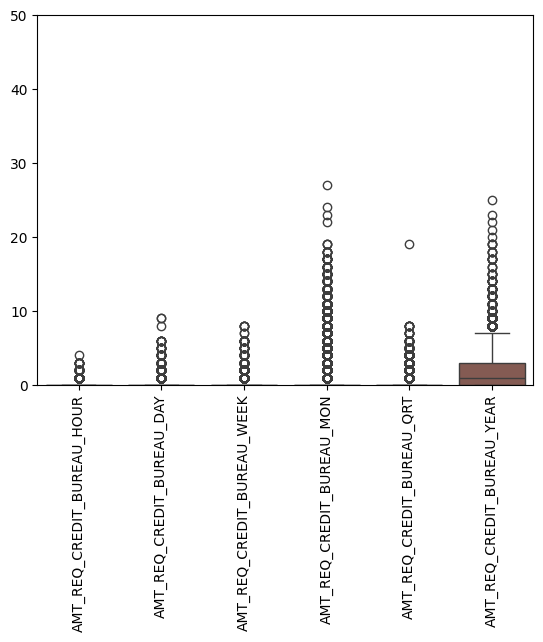

In [33]:
# creating misc_cols which contains columns that are related to amount of enquiries to Credit Bureau about the client in 
# a particular span of time
misc_cols= application_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].columns
sns.boxplot(application_data[misc_cols])
plt.xticks(rotation=90)
plt.ylim(0,50)
plt.show()


In [34]:
'''we have freedom of dropping or not using the above columns in "misc_cols" for our analysis. 
However, I would like to append a new column called "Total_Enq_credit_bureau" which is the addition of all the enquiries for last year.
And then we will drop these columns as we did for the "FLAG_DOCUMENT" group of columns.
'''

application_data['Total_Enq_Credit_Bureau']= application_data[misc_cols].sum(axis=1)
application_data.drop(columns= misc_cols, inplace=True)
application_data.isnull().mean()*100


SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [35]:
#dropping 'EXT_SOURCE_3' column 
application_data.drop(columns='EXT_SOURCE_3', inplace=True)
# application_data.isnull().mean()*100

In [36]:
# lets convert negative values for certain columns to positive values of days
columns_to_convert= ['DAYS_BIRTH', 'DAYS_EMPLOYED',	'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
application_data[columns_to_convert] = application_data[columns_to_convert].apply(abs)


Imputing 'OCCUPATION_TYPE' column:

<Axes: ylabel='OCCUPATION_TYPE'>

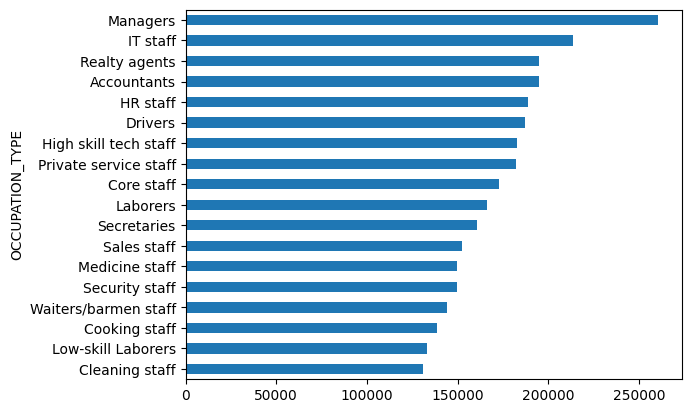

In [37]:
'''lets impute the last remaining column containing missing values : 'OCCUPATION_TYPE'.
Instead of directly imputing with mode (i.e. labourers) which will further dominate the labourers in our analysis,
we will try to impute based on relationship with some other column. Lets find such a column
'''

application_data.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean().sort_values().plot.barh()

In [38]:
application_data.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean()

ORGANIZATION_TYPE       OCCUPATION_TYPE      
Advertising             Accountants              195057.692308
                        Cleaning staff           137250.000000
                        Cooking staff            112500.000000
                        Core staff               187794.642857
                        Drivers                  212040.000000
                        High skill tech staff    128925.000000
                        IT staff                 202500.000000
                        Laborers                 155794.354839
                        Low-skill Laborers       160200.000000
                        Managers                 313137.931034
                        Medicine staff            58500.000000
                        Sales staff              177125.000000
                        Secretaries              136500.000000
                        Security staff           144000.000000
                        Waiters/barmen staff     315000.000000
Agricultu

In [39]:
'''We will use the columns "ORGANIZATION_TYPE" "AMT_INCOME_TOTAL" to determine which "OCCUPATION_TYPE"
is most likely to be our value for the missing "OCCUPATION_TYPE".
We will look at the 'ORGANIZATION_TYPE' value and in that we will see which "OCCUPATION_TYPE" has the
closest value of "AMT_INCOME_TOTAL". 
'''
temp=pd.DataFrame(application_data.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean())
temp.reset_index(inplace=True)
# temp.head()

# creating a function to return closest occupation type for the organization_type and amt_income_total
def get_closest_occupation(org_type, income):
    subset = temp[temp['ORGANIZATION_TYPE'] == org_type]
    if subset.empty:
        return None
    closest_index = (subset['AMT_INCOME_TOTAL'] - income).abs().idxmin()
    return subset.loc[closest_index, 'OCCUPATION_TYPE']


# # testing the function
# print(get_closest_occupation('Mobile', 174145))
# print(get_closest_occupation('Insurance', 184830))

# Applying the function with fillna() to impute missing OCCUPATION_TYPE values
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna( 
    application_data.apply( 
        lambda row: get_closest_occupation(row['ORGANIZATION_TYPE'], row['AMT_INCOME_TOTAL']), 
        axis=1 ))



In [40]:
application_data.isnull().sum().sum()

0

In [41]:
# we will convert the columns containing <=3 unique values into categorical columns
for col in application_data.columns:
    if application_data[col].nunique() <= 3:
        application_data[col] = application_data[col].astype(object)
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Categorizing the 'AMT_INCOME_TOTAL' column:

In [42]:
pd.options.display.float_format = '{:.4f}'.format
application_data['AMT_INCOME_TOTAL'].describe()

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [43]:
'''We will be creating a new column based on "AMT_INCOME_TOTAL" which will be a categorical
column representing ranges of total incomes of applicants
'''

# Defining new bins and labels
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 500000, 1000000, application_data['AMT_INCOME_TOTAL'].max()]
labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-150000', '150000-200000', '200000-300000', '300000-500000', '500000-1000000', '1000000+']

# Creating the new categorical column
application_data['Amt_Income_Total_cat'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)

# Displaying the value counts of the new categorical column
print(application_data['Amt_Income_Total_cat'].value_counts())

Amt_Income_Total_cat
100000-150000     91591
200000-300000     65176
150000-200000     64307
75000-100000      39806
300000-500000     20037
50000-75000       19375
25000-50000        4517
500000-1000000     2452
1000000+            249
0-25000               0
Name: count, dtype: int64


In [44]:
application_data[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
count  307511.0000  307511.0000      307511.0000
mean   599025.9997   27108.4878      538316.2944
std    402490.7770   14493.4611      369288.9822
min     45000.0000    1615.5000       40500.0000
25%    270000.0000   16524.0000      238500.0000
50%    513531.0000   24903.0000      450000.0000
75%    808650.0000   34596.0000      679500.0000
max   4050000.0000  258025.5000     4050000.0000

In [45]:
# doing the same kind of categorization for ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'] as we did for 'AMT_INCOME_TOTAL'

#for AMT_CREDIT
bins_credit = [0, 100000, 250000, 500000, 750000, 1000000, 1500000, 2000000, 3000000, 4050000]
labels_credit = ['0-100000', '100000-250000', '250000-500000', '500000-750000', '750000-1000000', '1000000-1500000', '1500000-2000000', '2000000-3000000', '3000000+']
application_data['Amt_Credit_cat'] = pd.cut(application_data['AMT_CREDIT'], bins=bins_credit, labels=labels_credit, right=False)
print(application_data['Amt_Credit_cat'].value_counts())


#for AMT_ANNUITY
bins_annuity = [0, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000, 258025.5]
labels_annuity = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-50000', '50000-100000', '100000-200000', '200000+']
application_data['Amt_Annuity_cat'] = pd.cut(application_data['AMT_ANNUITY'], bins=bins_annuity, labels=labels_annuity, right=False)
print('\n\n',application_data['Amt_Annuity_cat'].value_counts())


# for AMT_GOODS_PRICE
bins_goods_price = [0, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 2000000, 4050000]
labels_goods_price = ['0-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-750000', '750000-1000000', '1000000-2000000', '2000000+']
application_data['Amt_Goods_Price_cat'] = pd.cut(application_data['AMT_GOODS_PRICE'], bins=bins_goods_price, labels=labels_goods_price, right=False)
print('\n\n',application_data['Amt_Goods_Price_cat'].value_counts())



Amt_Credit_cat
250000-500000      90135
500000-750000      65094
100000-250000      53194
750000-1000000     43099
1000000-1500000    39229
1500000-2000000     8727
0-100000            6004
2000000-3000000     1997
3000000+              24
Name: count, dtype: int64


 Amt_Annuity_cat
20000-30000      92478
30000-50000      87231
15000-20000      42825
10000-15000      40397
5000-10000       22142
50000-100000     20792
0-5000            1141
100000-200000      469
200000+             35
Name: count, dtype: int64


 Amt_Goods_Price_cat
200000-300000      62761
500000-750000      57883
400000-500000      57251
1000000-2000000    33026
100000-200000      32956
750000-1000000     32613
300000-400000      21219
0-100000            8709
2000000+            1085
Name: count, dtype: int64


In [46]:
# setting the dtype of 'SK_ID_CURR' to 'object'
application_data['SK_ID_CURR']= application_data['SK_ID_CURR'].astype('object')

In [47]:
'''
Finally, we have cleaned the application_data and we can now move on to clean "previous_application"

'''

'\nFinally, we have cleaned the application_data and we can now move on to clean "previous_application"\n\n'

### B. Cleaning previous_application

In [48]:
previous_application.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1670214.0000 1670214.0000 1297979.0000     1670214.0000 1670213.0000   
mean  1923089.1353  278357.1741   15955.1207      175233.8604  196114.0212   
std    532597.9587  102814.8238   14782.1373      292779.7624  318574.6165   
min   1000001.0000  100001.0000       0.0000           0.0000       0.0000   
25%   1461857.2500  189329.0000    6321.7800       18720.0000   24160.5000   
50%   1923110.5000  278714.5000   11250.0000       71046.0000   80541.0000   
75%   2384279.7500  367514.0000   20658.4200      180360.0000  216418.5000   
max   2845382.0000  456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count       774370.0000     1284699.0000             1670214.0000   
mean          6697.4021      227847.2793                  12.4842   
std          20921.4954      315396.5579                   3.3340   
min             -0.9000           0.0000                   0.0000   
25%              0.0000       50841.0000                  10.0000   
50%           1638.0000      112320.0000                  12.0000   
75%           7740.0000      234000.0000                  15.0000   
max        3060045.0000     6905160.0000                  23.0000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1670214.0000        774370.0000              5951.0000   
mean                   0.9965             0.0796                 0.1884   
std                    0.0593             0.1078                 0.0877   
min                    0.0000            -0.0000                 0.0348   
25%                    1.0000             0.0000                 0.1607   
50%                    1.0000             0.0516                 0.1891   
75%                    1.0000             0.1089                 0.1933   
max                    1.0000             1.0000                 1.0000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                 5951.0000   1670214.0000      1670214.0000 1297984.0000   
mean                     0.7735      -880.6797          313.9511      16.0541   
std                      0.1009       779.0997         7127.4435      14.5673   
min                      0.3732     -2922.0000           -1.0000       0.0000   
25%                      0.7156     -1300.0000           -1.0000       6.0000   
50%                      0.8351      -581.0000            3.0000      12.0000   
75%                      0.8525      -280.0000           82.0000      24.0000   
max                      1.0000        -1.0000      4000000.0000      84.0000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         997149.0000     997149.0000                997149.0000   
mean          342209.8550      13826.2693                 33767.7741   
std            88916.1158      72444.8697                106857.0348   
min            -2922.0000      -2892.0000                 -2801.0000   
25%           365243.0000      -1628.0000                 -1242.0000   
50%           365243.0000       -831.0000                  -361.0000   
75%           365243.0000       -411.0000                   129.0000   
max           365243.0000     365243.0000                365243.0000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count    997149.0000       997149.0000                997149.0000  
mean      76582.4031        81992.3438                     0.3326  
std      149647.4151       153303.5167                     0.4711  
min       -2889.0000        -2874.0000                     0.0000  
25%       -1314.0000        -1270.0000                     0.0000  
50%        -537.0000         -499.0000                     0.0000  
75%         -74.0000          -44.0000                     1.0000  
max      365243.0000       365243.0000                     1.0000

In [49]:
'''
converting the negative values in some columns into positive values
'''
columns_to_convert = ['DAYS_DECISION', 'SELLERPLACE_AREA', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
                      'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING']

previous_application[columns_to_convert] = previous_application[columns_to_convert].apply(abs)
previous_application.head(3)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               NaN      607500.0000                   THURSDAY   
2 136444.5000               NaN      112500.0000                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1             0.0000                 0.1828   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                    0.8673                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0             73  Cash through the bank                XAP              NaN   
1            164                    XNA                XAP    Unaccompanied   
2            301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                 1                  XNA   
2  Credit and cash offices                 1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  POS mobile with interest         365243.0000   
1      36.0000       low_action          Cash X-Sell: low         365243.0000   
2      12.0000             high         Cash X-Sell: high         365243.0000   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0         42.0000                   300.0000        42.0000           37.0000   
1        134.0000                   916.0000    365243.0000       365243.0000   
2        271.0000                    59.0000    365243.0000       365243.0000   

   NFLAG_INSURED_ON_APPROVAL  
0                     0.0000  
1                     1.0000  
2                     1.0000

In [50]:
# calculating the percentage of null values in previous_application
null_percentage = previous_application.isnull().mean()*100
null_percentage

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_ANNUITY                   22.2867
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0001
AMT_DOWN_PAYMENT              53.6365
AMT_GOODS_PRICE               23.0818
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
RATE_DOWN_PAYMENT             53.6365
RATE_INTEREST_PRIMARY         99.6437
RATE_INTEREST_PRIVILEGED      99.6437
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_TYPE_SUITE               49.1198
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_

In [51]:

# Dropping columns with more than 50% null values
previous_application = previous_application.drop(columns=null_percentage[null_percentage > 50].index)

# Filling missing values with median for numerical columns
for column in previous_application.select_dtypes(include=['float64', 'int64']).columns:
    previous_application[column].fillna(previous_application[column].median(), inplace=True)

# Filling missing values with mode for categorical columns
for column in previous_application.select_dtypes(include=['object']).columns:
    previous_application[column].fillna(previous_application[column].mode()[0], inplace=True)

previous_application.isnull().mean()*100

SK_ID_PREV                    0.0000
SK_ID_CURR                    0.0000
NAME_CONTRACT_TYPE            0.0000
AMT_ANNUITY                   0.0000
AMT_APPLICATION               0.0000
AMT_CREDIT                    0.0000
AMT_GOODS_PRICE               0.0000
WEEKDAY_APPR_PROCESS_START    0.0000
HOUR_APPR_PROCESS_START       0.0000
FLAG_LAST_APPL_PER_CONTRACT   0.0000
NFLAG_LAST_APPL_IN_DAY        0.0000
NAME_CASH_LOAN_PURPOSE        0.0000
NAME_CONTRACT_STATUS          0.0000
DAYS_DECISION                 0.0000
NAME_PAYMENT_TYPE             0.0000
CODE_REJECT_REASON            0.0000
NAME_TYPE_SUITE               0.0000
NAME_CLIENT_TYPE              0.0000
NAME_GOODS_CATEGORY           0.0000
NAME_PORTFOLIO                0.0000
NAME_PRODUCT_TYPE             0.0000
CHANNEL_TYPE                  0.0000
SELLERPLACE_AREA              0.0000
NAME_SELLER_INDUSTRY          0.0000
CNT_PAYMENT                   0.0000
NAME_YIELD_GROUP              0.0000
PRODUCT_COMBINATION           0.0000
D

In [52]:
previous_application.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1670214.0000 1670214.0000 1670214.0000     1670214.0000 1670214.0000   
mean  1923089.1353  278357.1741   14906.5062      175233.8604  196113.9520   
std    532597.9587  102814.8238   13177.5141      292779.7624  318574.5337   
min   1000001.0000  100001.0000       0.0000           0.0000       0.0000   
25%   1461857.2500  189329.0000    7547.0963       18720.0000   24160.5000   
50%   1923110.5000  278714.5000   11250.0000       71046.0000   80541.0000   
75%   2384279.7500  367514.0000   16824.0263      180360.0000  216418.5000   
max   2845382.0000  456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
count     1670214.0000             1670214.0000            1670214.0000   
mean       201181.5352                  12.4842                  0.9965   
std        280862.8572                   3.3340                  0.0593   
min             0.0000                   0.0000                  0.0000   
25%         67500.0000                  10.0000                  1.0000   
50%        112320.0000                  12.0000                  1.0000   
75%        180405.0000                  15.0000                  1.0000   
max       6905160.0000                  23.0000                  1.0000   

       DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count   1670214.0000      1670214.0000 1670214.0000        1670214.0000   
mean        880.6797          314.8644      15.1506         351569.5143   
std         779.0997         7127.4032      12.9522          69231.9299   
min           1.0000            0.0000       0.0000              2.0000   
25%         280.0000            1.0000      10.0000         365243.0000   
50%         581.0000            3.0000      12.0000         365243.0000   
75%        1300.0000           82.0000      16.0000         365243.0000   
max        2922.0000      4000000.0000      84.0000         365243.0000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count    1670214.0000               1670214.0000   1670214.0000   
mean        9893.1309                 21291.7948     47124.0852   
std        56124.0138                 83932.4136    121041.8626   
min            2.0000                     0.0000         2.0000   
25%          752.0000                   536.0000       873.0000   
50%          921.0000                   741.0000      1155.0000   
75%         1132.0000                   996.0000      1518.0000   
max       365243.0000                365243.0000    365243.0000   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count      1670214.0000               1670214.0000  
mean         50326.4008                     0.1986  
std         124549.2675                     0.3989  
min              2.0000                     0.0000  
25%            876.0000                     0.0000  
50%           1171.0000                     0.0000  
75%           1544.0000                     0.0000  
max         365243.0000                     1.0000

In [53]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [54]:
# lastly let us convert certain columns into int
cols_to_int= ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
              'DAYS_LAST_DUE', 'DAYS_TERMINATION' ]
for col in cols_to_int:
    previous_application[col] = previous_application[col].astype(int)

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [55]:
'''We are done with the cleaning process of our two dataframes: application_data and previous_application.
Further, we will start analysing the Data 
'''

'We are done with the cleaning process of our two dataframes: application_data and previous_application.\nFurther, we will start analysing the Data \n'

## <b><u>Exploratory Data Analysis</u></b>

In [56]:
'''
We will do EDA on application_data and previous_application dataframes now to generate insights.
Later, we will merge them into one dataframe and see what insights we can have out of it.
'''

'\nWe will do EDA on application_data and previous_application dataframes now to generate insights.\nLater, we will merge them into one dataframe and see what insights we can have out of it.\n'

##### Analyzing application_data

In [57]:
# create a dtype 'int' version of TARGET variable so we plot target however we want

# application_data['TARGET'].dtype
application_data['TARGET_num'] = application_data['TARGET']
application_data['TARGET_num'] = application_data['TARGET'].astype(int)


In [58]:
#creating list of numerical and categorical columns for future use
app_cat = application_data.select_dtypes(include=['object']).columns
app_num = application_data.select_dtypes(include=['number']).columns
app_cat, app_num

(Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
       dtype='object'),
 Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
        'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
        'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
        'OBS_30_CNT_S

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64


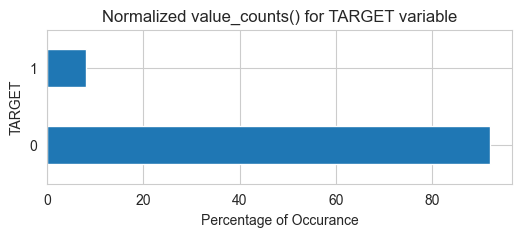

In [195]:
# trying to understand the distribution of 'TARGET' variable
print(application_data.TARGET.value_counts(normalize=True)*100)
plt.figure(figsize=(6,2))
(application_data.TARGET.value_counts(normalize=True)*100).plot.barh()
plt.title('Normalized value_counts() for TARGET variable')
plt.xlabel('Percentage of Occurance')
plt.show()

In [60]:
'''we see that our target variable 'TARGET' is hugely imbalanced. 8.07% of data shows 
entries with payment difficulties aka defaulters, while 91.92% of people are non defaulters.
We will make separate dataframes to analyse based on 'TARGET' variable. 

'''
target_1= application_data[application_data.TARGET ==1]
target_0= application_data[application_data.TARGET ==0]
target_0.shape, target_1.shape

((282686, 53), (24825, 53))

Performing UniVariate Analysis

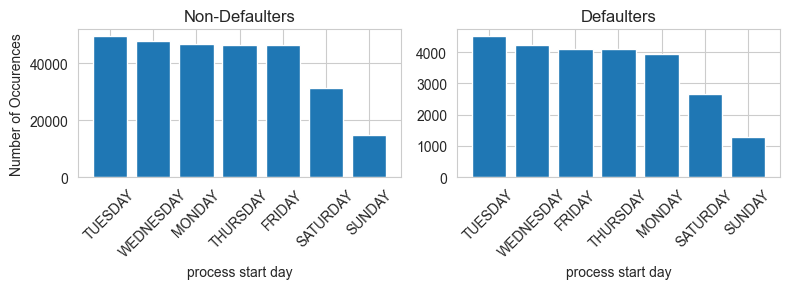

In [166]:
# WEEKDAY_APPR_PROCESS_START vs TARGET
plt.figure(figsize=(8,3))
weekday_vc_0=target_0.WEEKDAY_APPR_PROCESS_START.value_counts()
weekday_vc_1=target_1.WEEKDAY_APPR_PROCESS_START.value_counts()

plt.subplot(121)
plt.bar(weekday_vc_0.index, weekday_vc_0.values)
plt.xticks(rotation=45)
plt.title('Non-Defaulters')
plt.xlabel('process start day')
plt.ylabel('Number of Occurences')
plt.subplot(122)
plt.bar(weekday_vc_1.index, weekday_vc_1.values)
plt.xticks(rotation=45)
plt.title('Defaulters')
plt.xlabel('process start day')
plt.tight_layout()
plt.show()

In [ ]:
'''There seems to be no particular relation between defaulters and non-defaulters based on weekday of process.
Both are similar patterns and '''

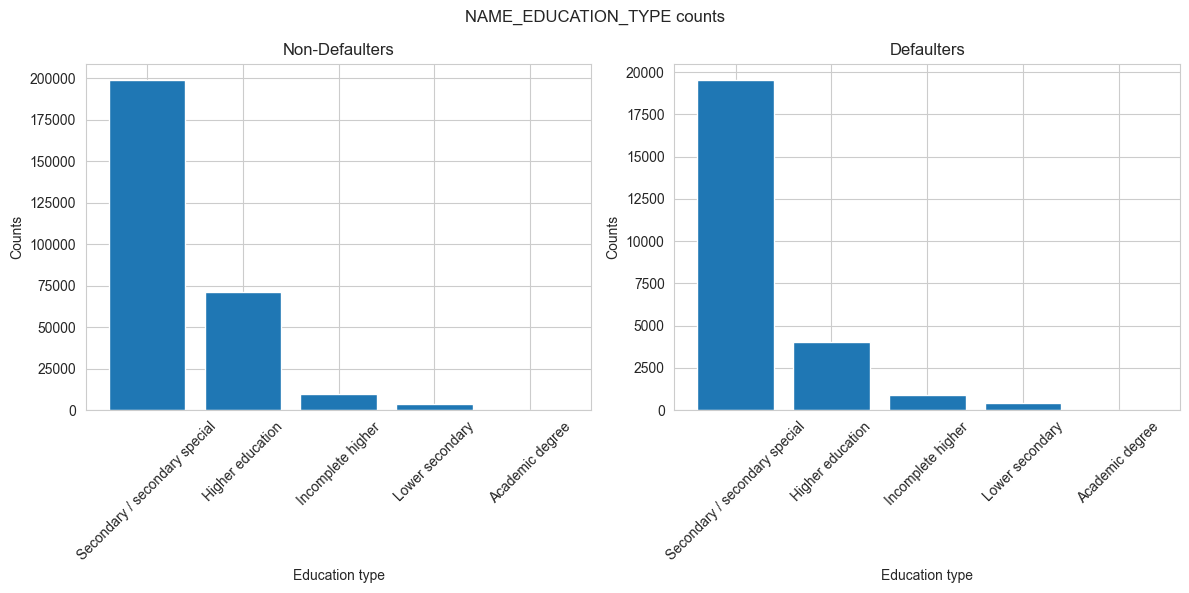

In [197]:
# NAME_EDUCATION_TYPE values
plt.figure(figsize=(12,6))
edu_type_0 = target_0.NAME_EDUCATION_TYPE.value_counts(normalize=False)
edu_type_1 = target_1.NAME_EDUCATION_TYPE.value_counts(normalize=False)
plt.suptitle('NAME_EDUCATION_TYPE counts')
plt.subplot(1,2,1)
plt.bar(data=edu_type_0, x=edu_type_0.index, height= edu_type_0.values)
plt.title('Non-Defaulters')
plt.tight_layout()
plt.xlabel('Education type')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(data=edu_type_1, x=edu_type_1.index, height= edu_type_1.values)
plt.title('Defaulters')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Education type')
plt.tight_layout()
plt.show()

In [ ]:
'''
the education type shows that people with higher education corresponds to less possibility to default.
'''

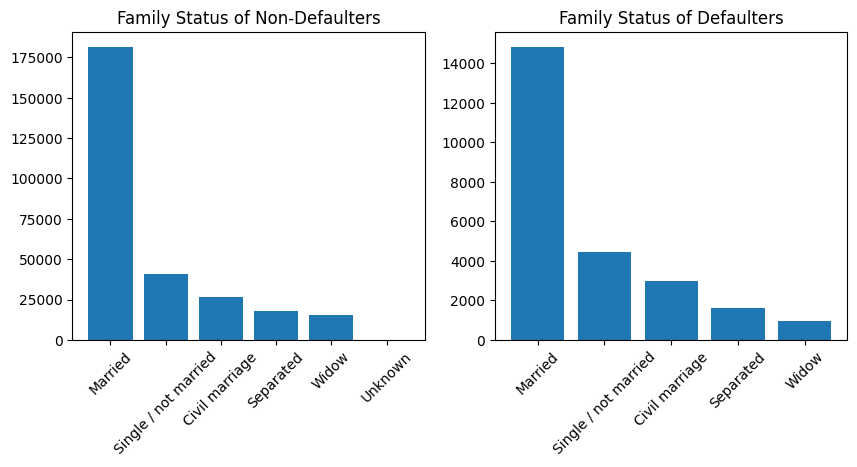

In [63]:
# NAME_FAMILY_STATUS : understanding family status of applicants
family_status_0=target_0.NAME_FAMILY_STATUS.value_counts()
family_status_1=target_1.NAME_FAMILY_STATUS.value_counts()

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(x=family_status_0.index, height= family_status_0.values)
plt.title('Family Status of Non-Defaulters')
plt.xticks(rotation=45)

plt.subplot(122)
plt.bar(x=family_status_1.index, height= family_status_1.values)
plt.title('Family Status of Defaulters')
plt.xticks(rotation=45)

plt.show()

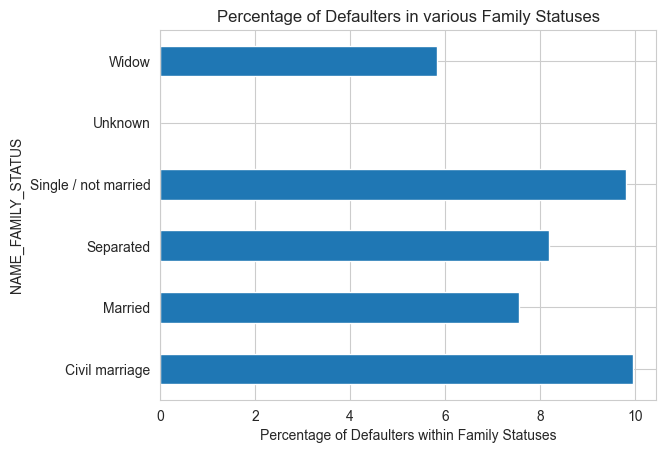

In [207]:
# percentage of defaulters
family_status_all= application_data['NAME_FAMILY_STATUS'].value_counts().sort_index()
family_status_target_1= target_1['NAME_FAMILY_STATUS'].value_counts().sort_index()
(100*family_status_target_1/family_status_all).plot.barh()

plt.xlabel('Percentage of Defaulters within Family Statuses')
plt.title('Percentage of Defaulters in various Family Statuses')
plt.show()

In [ ]:
'''
Married people have taken most number of loans while widows applied for loan the least.

'''

OCCUPATION_TYPE distribution

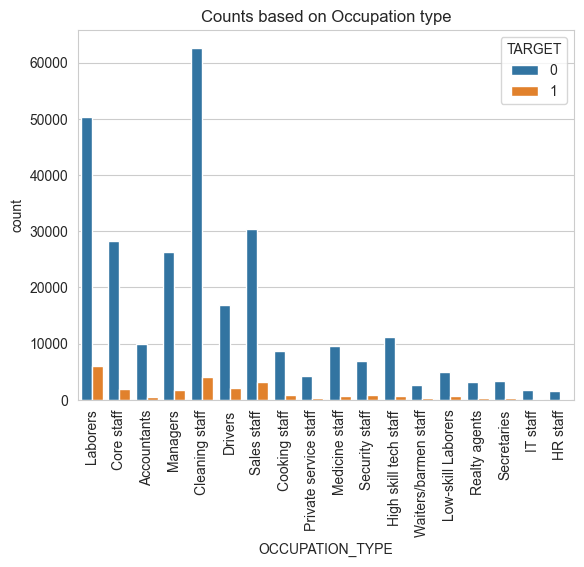

In [169]:
sns.countplot(x=application_data['OCCUPATION_TYPE'], hue='TARGET', data=application_data)
plt.xticks(rotation=90)
plt.title('Counts based on Occupation type')
plt.show()

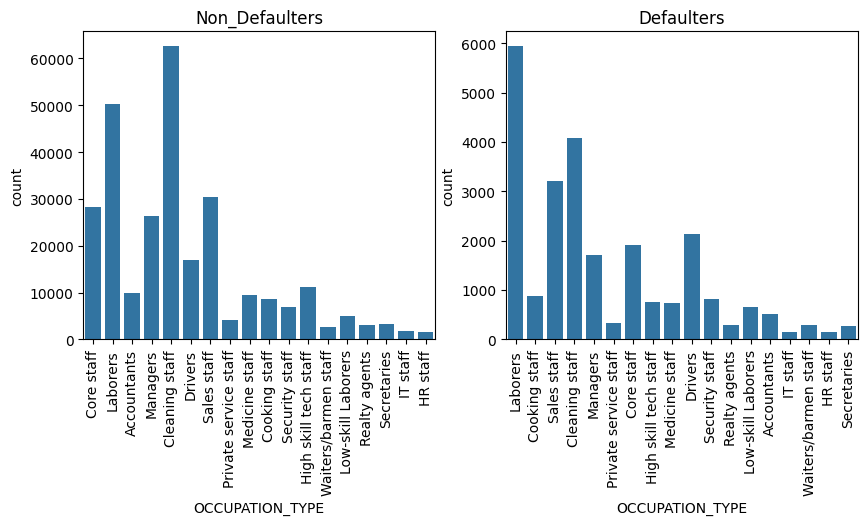

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x=target_0['OCCUPATION_TYPE'])
plt.title('Non_Defaulters')
plt.xticks(rotation=90)

plt.subplot(122)
sns.countplot(x=target_1['OCCUPATION_TYPE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()


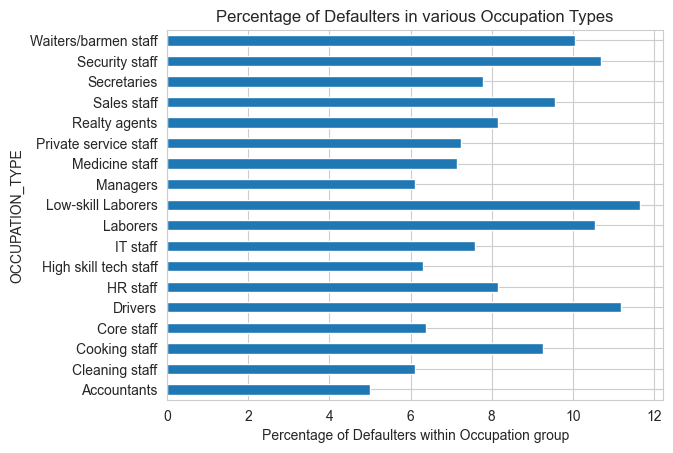

In [204]:
# percentage of defaulters
occupation_all= application_data['OCCUPATION_TYPE'].value_counts().sort_index()
occupation_target_1= target_1['OCCUPATION_TYPE'].value_counts().sort_index()
(100*occupation_target_1/occupation_all).plot.barh()

plt.xlabel('Percentage of Defaulters within Occupation group')
plt.title('Percentage of Defaulters in various Occupation Types')
plt.show()

In [66]:
# we can see that cleaning staff has most number of loan applications 
# but Labourers have the most number of payment difficulties

In [ ]:
'''Labourers exhibit a higher likelihood of defaulting on payments, even though they have fewer occurrences compared to cleaning staff. 
On the other hand, occupations such as Accountants, Private Service staff, Medical staff, Security staff, 
and High-Skill Tech staff present the lowest risk for loan issuance, as their default rates are significantly lower compared to non-defaulters. 
Also, Laborers, Cleaning staff and sales staff are most risky as seen in the plot above
'''

NAME_HOUSING_TYPE  evaluation

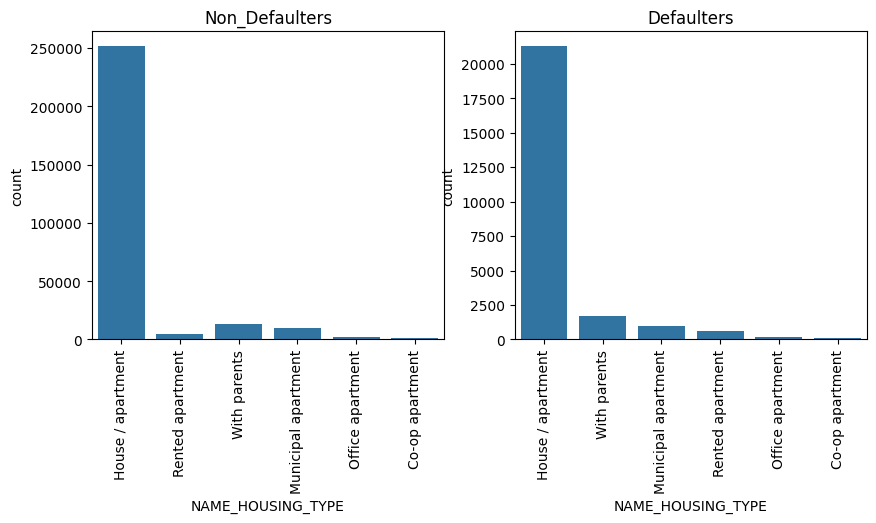

In [67]:
current_column= 'NAME_HOUSING_TYPE'
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x=target_0[current_column])
plt.title('Non_Defaulters')
plt.xticks(rotation=90)

plt.subplot(122)
sns.countplot(x=target_1[current_column])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

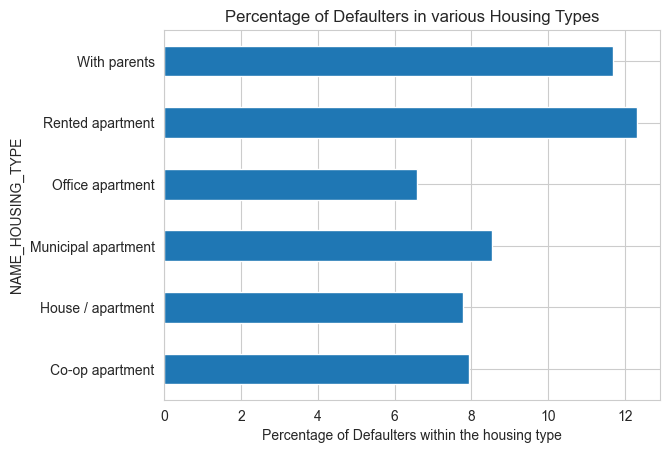

In [205]:
# percentage of defaulters
housing_all= application_data['NAME_HOUSING_TYPE'].value_counts().sort_index()
housing_target_1= target_1['NAME_HOUSING_TYPE'].value_counts().sort_index()
(100*housing_target_1/housing_all).plot.barh()

plt.xlabel('Percentage of Defaulters within the housing type')
plt.title('Percentage of Defaulters in various Housing Types')
plt.show()

In [ ]:
'''most applications come from housing type: House/apartment while office apartment clients donot opt for loans as commonly.
clients living with parents and rented apartments are most like to defaul while those who live
in office apartment are least likely to default.
'''

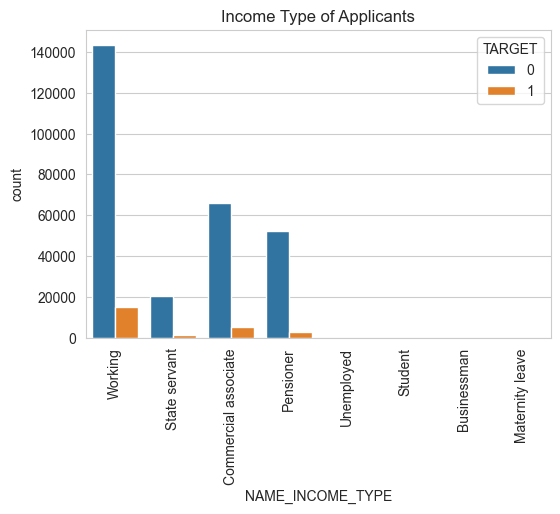

In [173]:
# NAME_INCOME_TYPE :
plt.figure(figsize=(6,4))
sns.countplot(x='NAME_INCOME_TYPE', hue= 'TARGET', data=application_data)
plt.title('Income Type of Applicants')
plt.xticks(rotation=90)
plt.show()


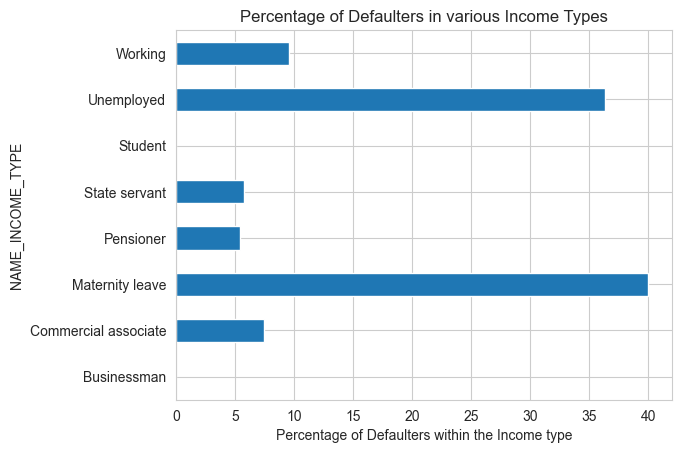

In [208]:
# percentage of defaulters
income_all= application_data['NAME_INCOME_TYPE'].value_counts().sort_index()
income_target_1= target_1['NAME_INCOME_TYPE'].value_counts().sort_index()
(100*income_target_1/income_all).plot.barh()

plt.xlabel('Percentage of Defaulters within the Income type')
plt.title('Percentage of Defaulters in various Income Types')
plt.show()

In [ ]:
'''Working professionals, commercial associate and Pensioners are the highest number of applicants while students, unemployed, businessman
 and maternity leave are the lease occuring categories. 
 Unemployed and Maternity leave categories have most defaulters among the category, while working, state servant, pensioner, commercial associate
 are categories which show lesser probability of defaulting.
 '''

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


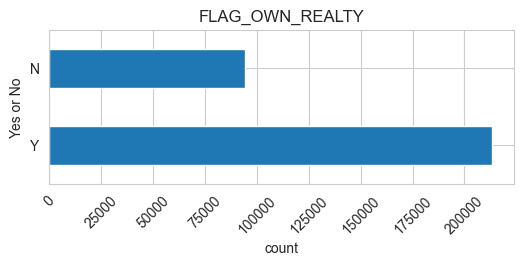

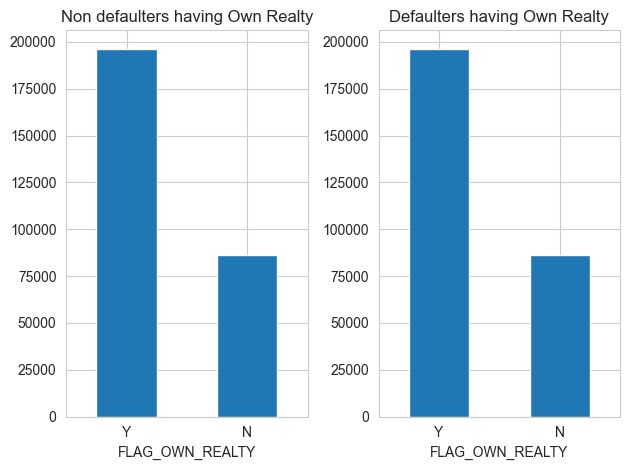

In [180]:
# FLAG_OWN_REALTY : 
print(application_data.FLAG_OWN_REALTY.value_counts())
plt.figure(figsize=(6,2))
application_data.FLAG_OWN_REALTY.value_counts().plot.barh()
plt.xlabel('count')
plt.ylabel('Yes or No')
plt.title('FLAG_OWN_REALTY')
plt.xticks(rotation=45)
plt.show()

plt.subplot(121)
target_0.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Non defaulters having Own Realty')

plt.subplot(122)
target_0.FLAG_OWN_REALTY.value_counts().plot.bar()
plt.title('Defaulters having Own Realty')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
'''we donot have any significant relationship between defaulting and owning realty.'''

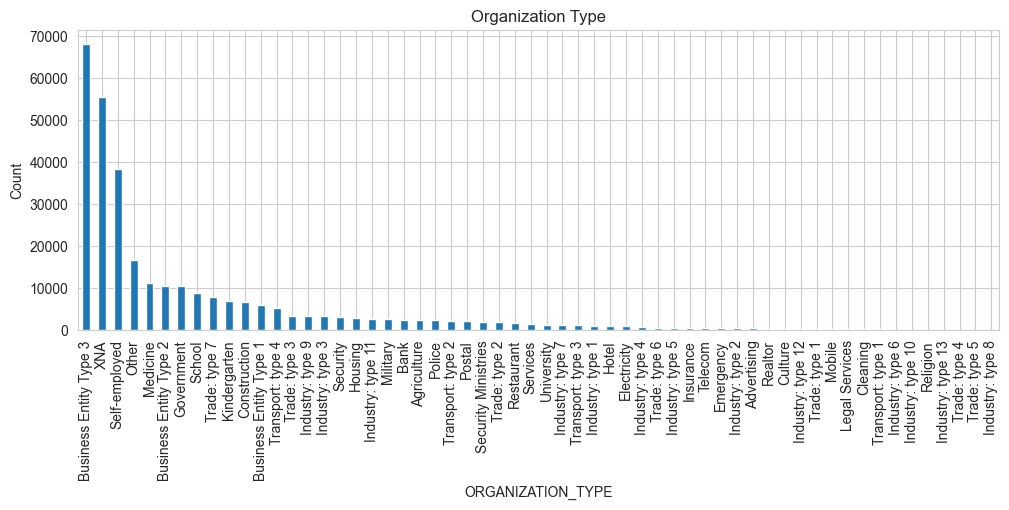

In [70]:
# ORGANIZATION_TYPE
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
application_data.ORGANIZATION_TYPE.value_counts().sort_values(ascending=False).plot.bar()
plt.tight_layout()
plt.title('Organization Type')
plt.ylabel('Count')
plt.show()


In [ ]:
'''Business Entity Type 3, XNA and Self-employed are most common organization types to apply for loans.'''

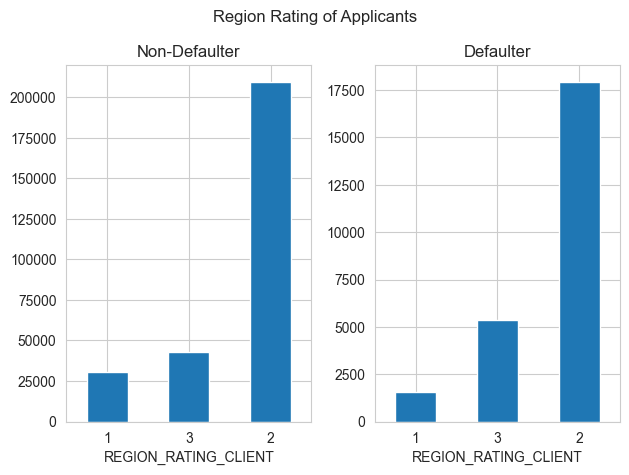

In [71]:
# REGION_RATING_CLIENT
plt.suptitle('Region Rating of Applicants')
plt.subplot(121)
target_0.REGION_RATING_CLIENT.value_counts().sort_values().plot.bar()
plt.xticks(rotation=0)
plt.title('Non-Defaulter')

plt.subplot(122)
target_1.REGION_RATING_CLIENT.value_counts().sort_values().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Defaulter')
plt.show()

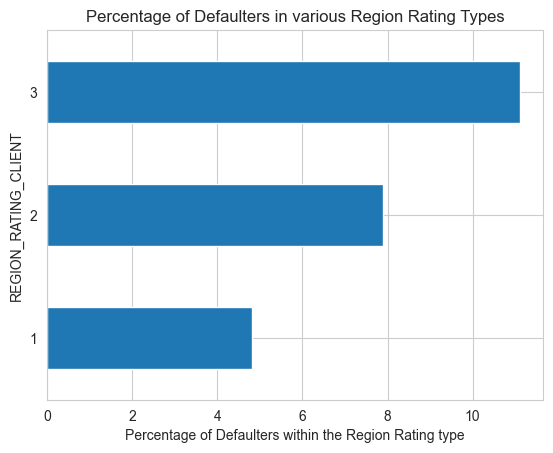

In [209]:
# percentage of defaulters
region_rating_all= application_data['REGION_RATING_CLIENT'].value_counts().sort_index()
region_rating_target_1= target_1['REGION_RATING_CLIENT'].value_counts().sort_index()
(100*region_rating_target_1/region_rating_all).plot.barh()

plt.xlabel('Percentage of Defaulters within the Region Rating type')
plt.title('Percentage of Defaulters in various Region Rating Types')
plt.show()

In [ ]:
'''clients in region rating of 2 are the most number of applicants for loans.
however region rating of 1 are least likely to default and 3 are most likely to default on payments
'''

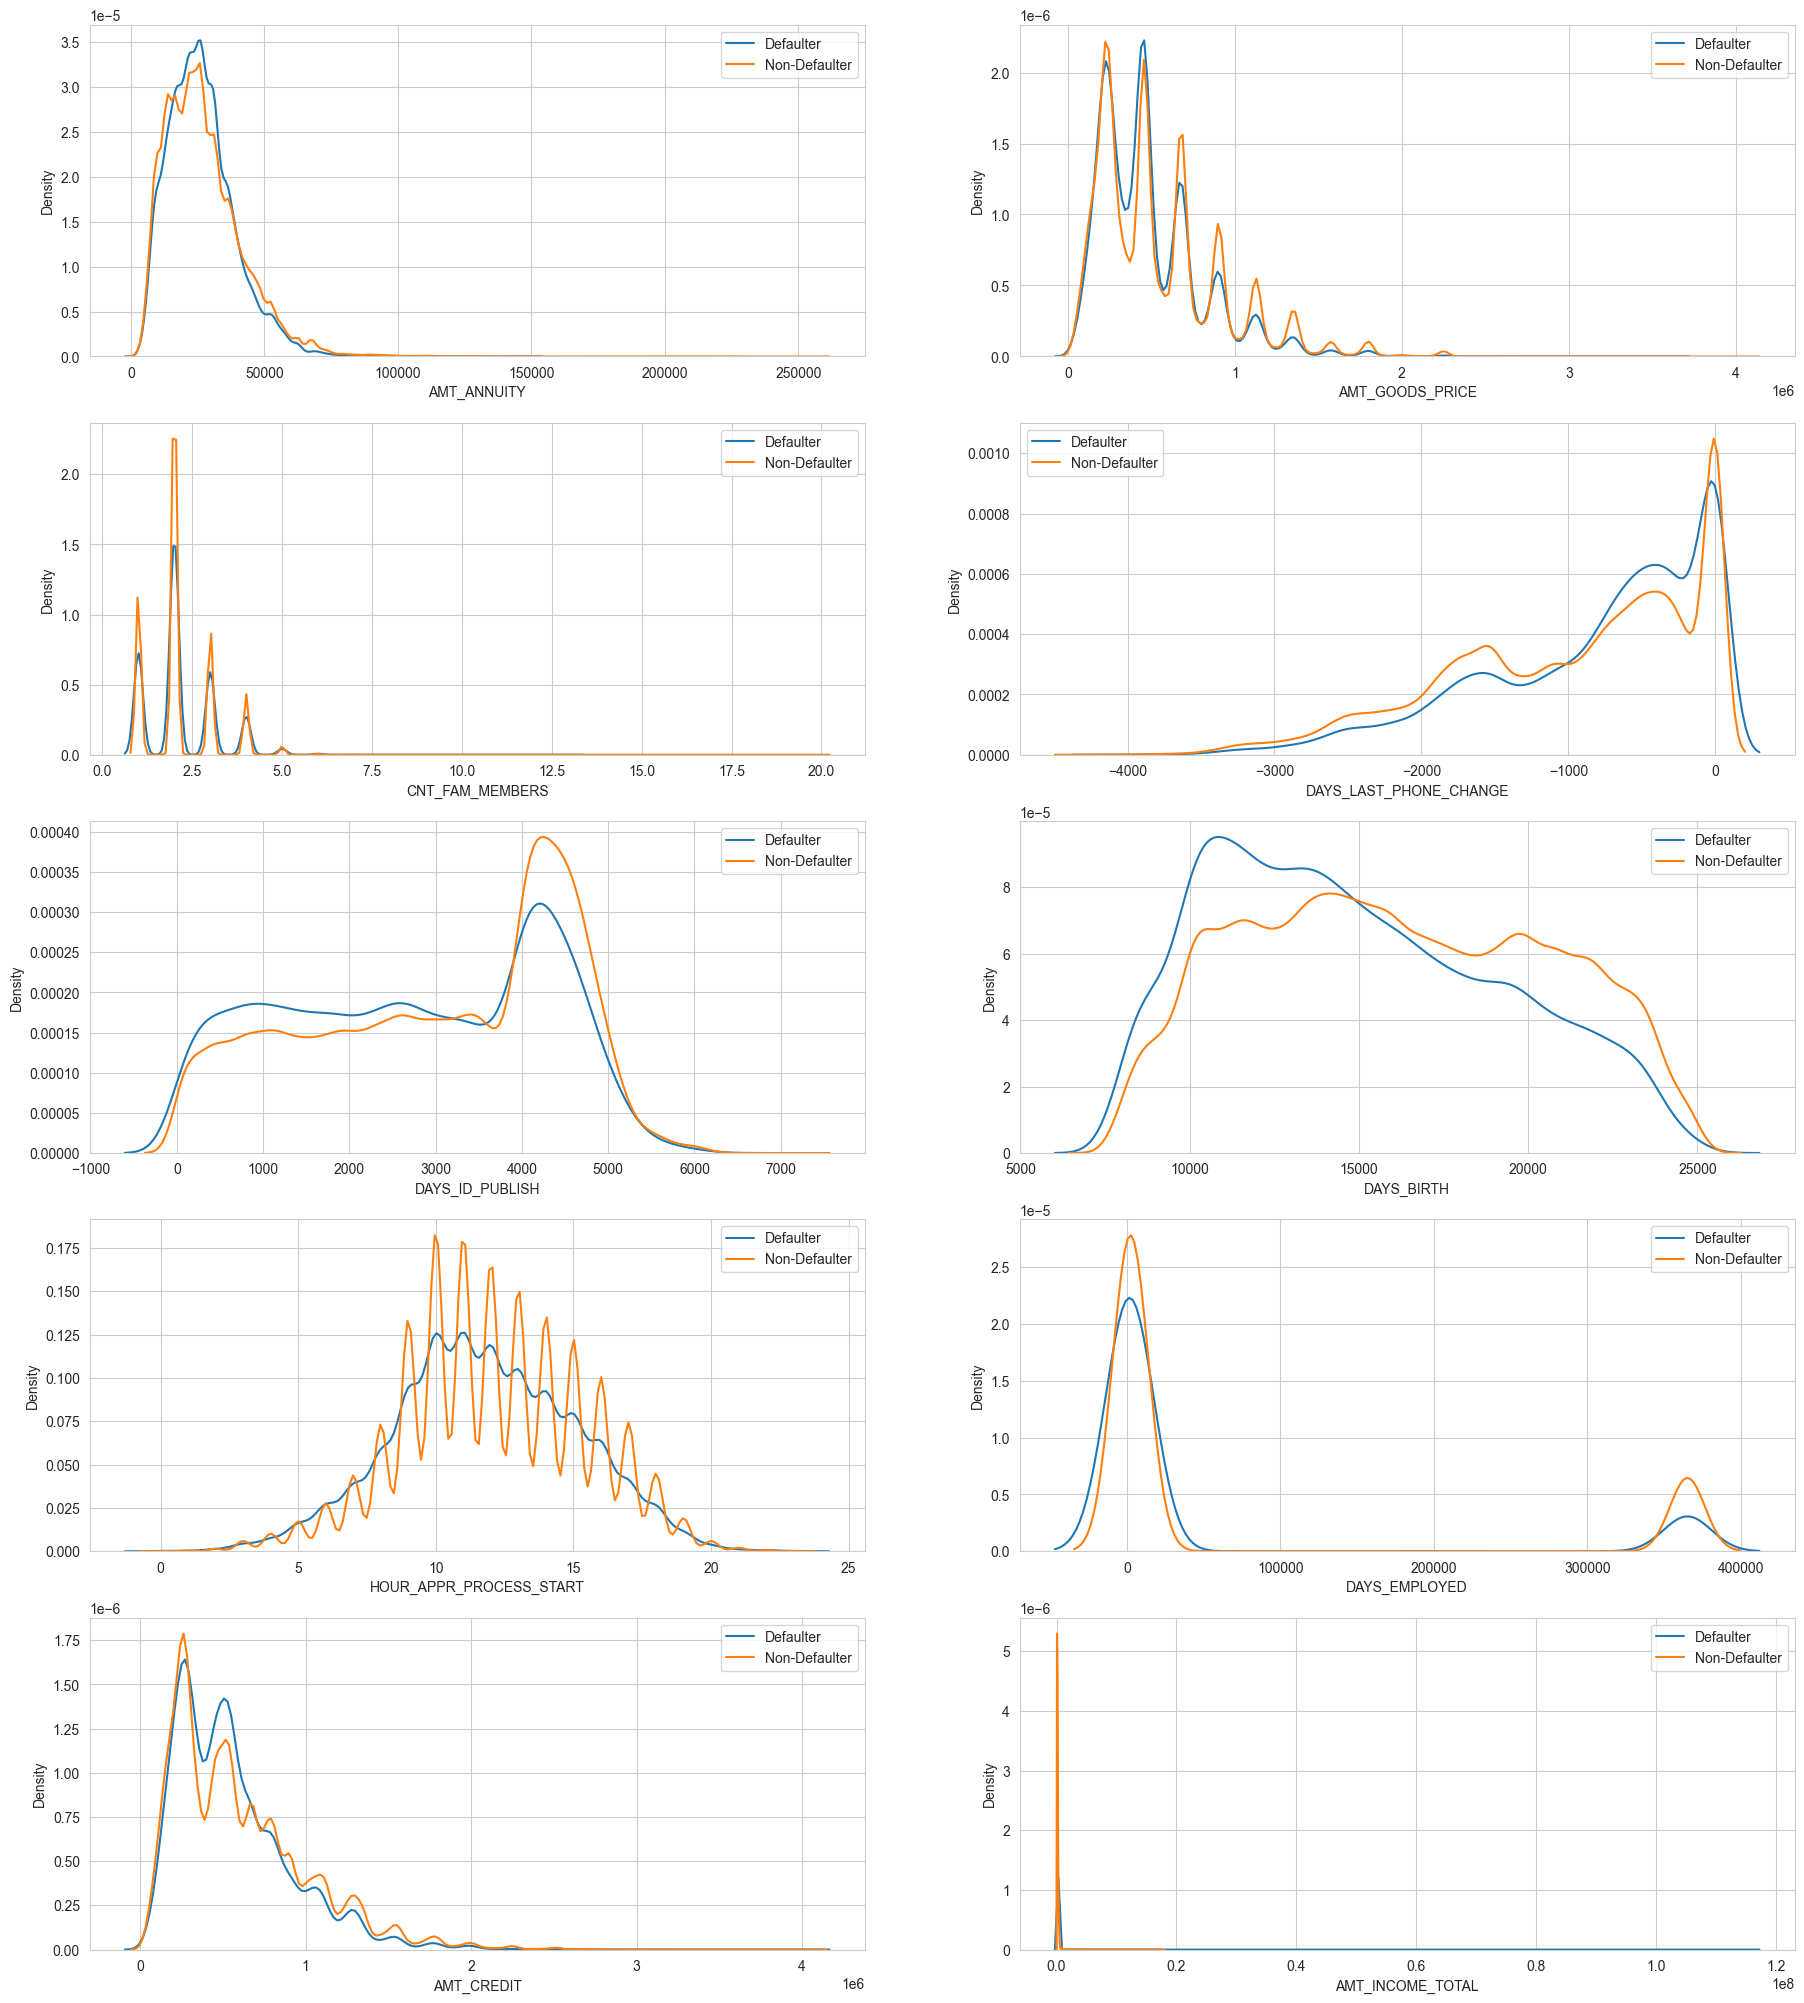

In [72]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i,col in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i+1)
    sns.kdeplot(target_1[col], label='Defaulter')
    sns.kdeplot(target_0[col], label='Non-Defaulter')
    plt.legend()
plt.show()  

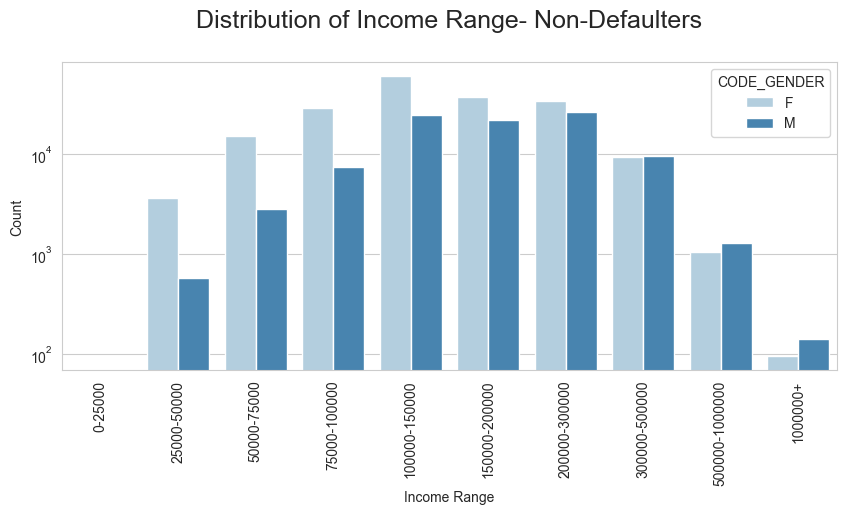

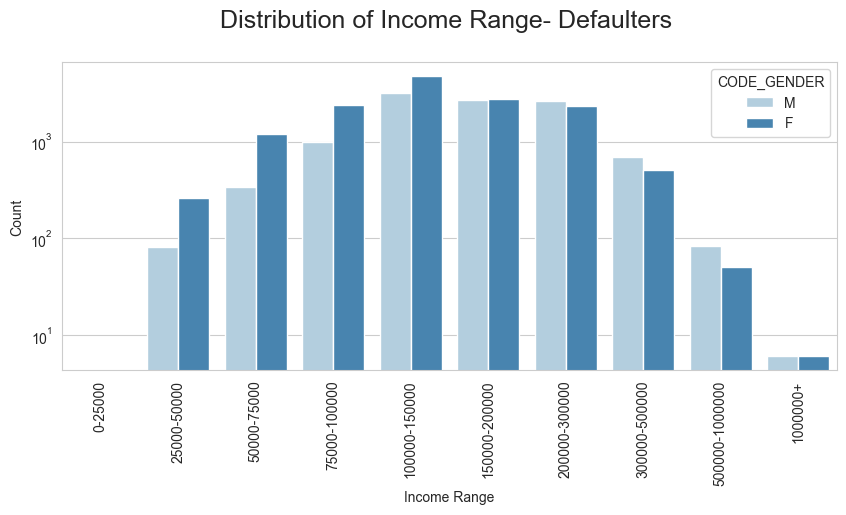

In [182]:
# Plotting 'Amt_Income_Total_cat' for Income Range across various Genders.

# PLOTTING FOR target_0 i.e. Non-Defaulters
plt.figure(figsize=[10,4])
sns.set_style('whitegrid')
sns.countplot(data=target_0, x='Amt_Income_Total_cat', hue='CODE_GENDER', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range- Non-Defaulters\n', fontsize=18)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# PLOTTING FOR target_1. i.e. defaulters
plt.figure(figsize=[10,4])
sns.countplot(data=target_1, x='Amt_Income_Total_cat', hue='CODE_GENDER', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range- Defaulters \n', fontsize=18)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


In [ ]:
'''we see that most applicants are from income range of 50000 to 500000 and most common category is 100000-150000 in case
of both defaulters and non- defaulters.
'''

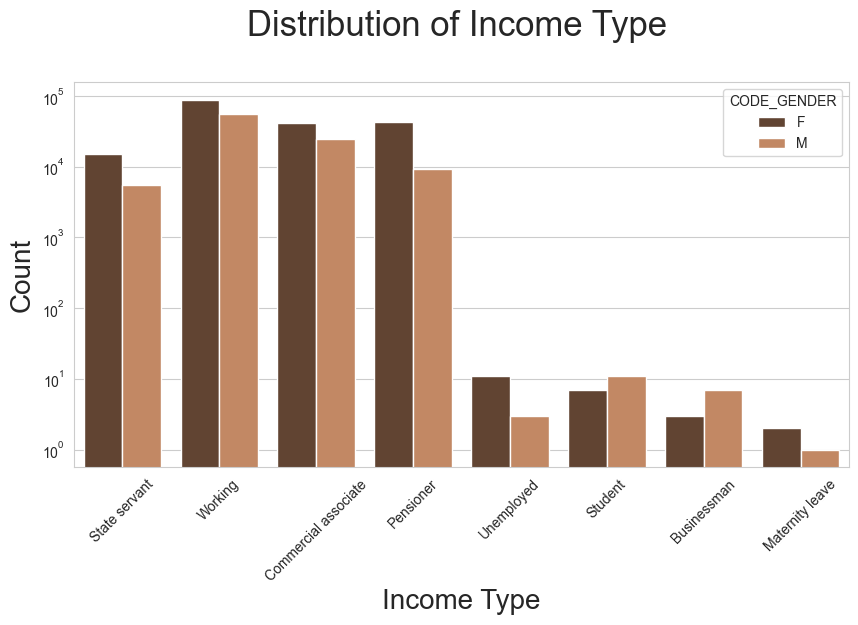

In [74]:
# Plotting for the various Income types across various Genders.

plt.figure(figsize=[10,5])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()


In [ ]:
'''State servant, working, Commercial associate and Pensioner are the most common Income types among applicants.
And Females dominate the number of applications in all these four Income types.'''

Correlation and heatmap

<Axes: >

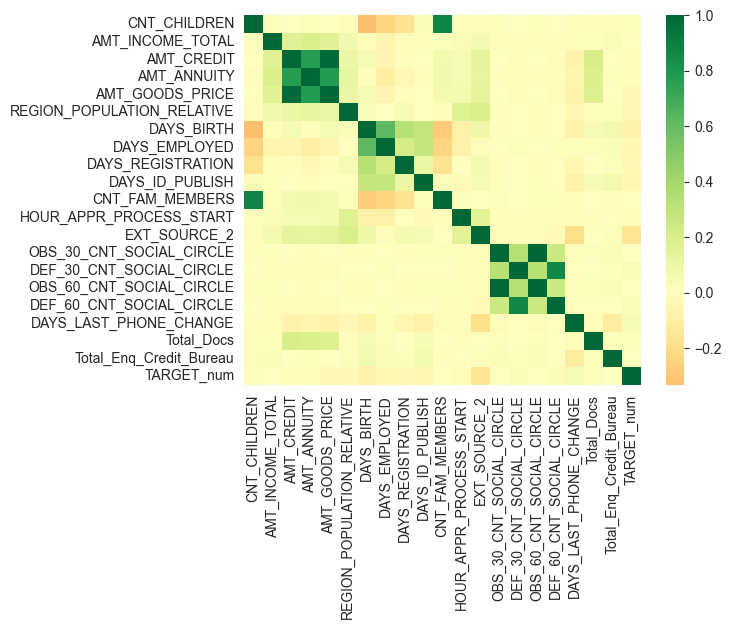

In [ ]:
# considering numerical columns in application_data 
sns.heatmap(application_data[app_num].corr(), cmap='RdYlGn', center=0)

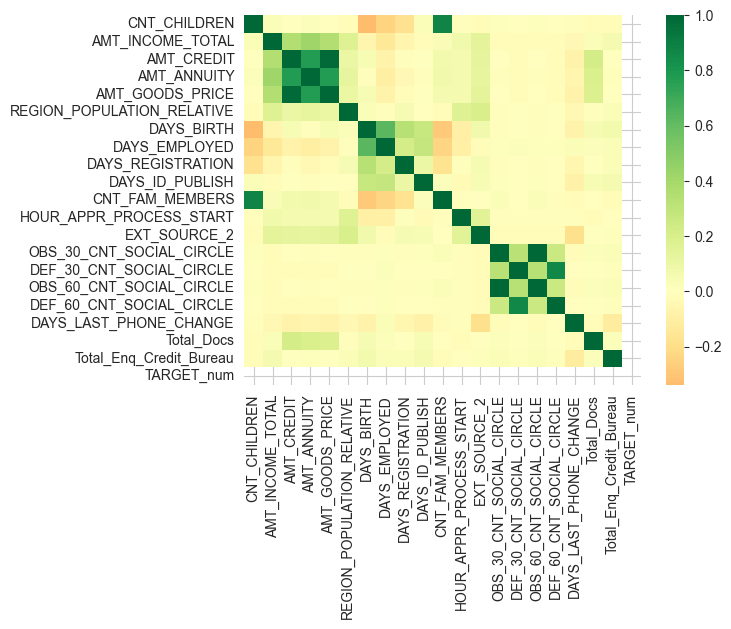

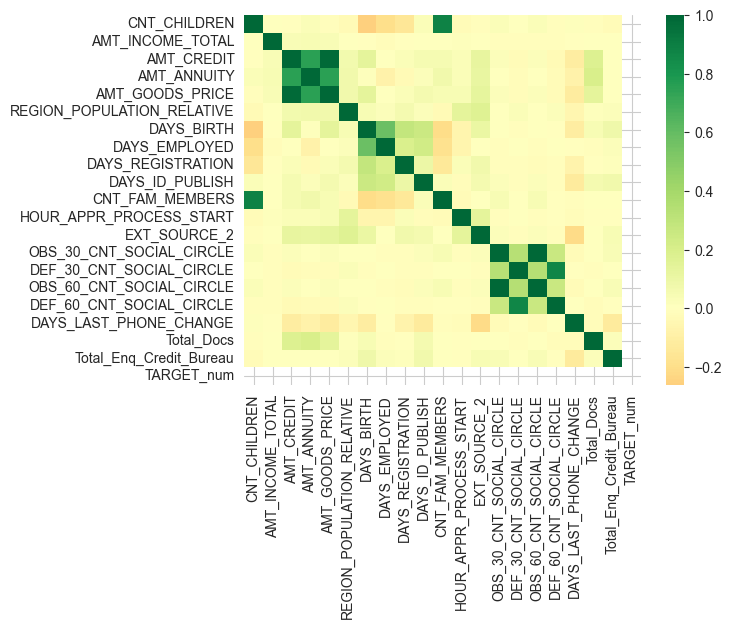

In [77]:
# correlations for target_0 and target_1 datasets

sns.heatmap(target_0[app_num].corr(), cmap='RdYlGn', center=0)
plt.show()
sns.heatmap(target_1[app_num].corr(), cmap='RdYlGn', center=0)
plt.show()

In [78]:
''' we can observe that correlation is there between the following:
strong correlation: CNT_FAM_MEMBERS VS CNT_CHILDREN, OBS_60_CNT_SOCIAL_CIRCLE VS OBS_30_CNT_SOCIAL_CIRCLE,
                    DEF_60_CNT_SOCIAL_CIRCLE VS DEF_30_CNT_SOCIAL_CIRCLE, DAYS_BIRTH VS DAYS_EMPLOYED,
                    AMT_ANNUITY VS AMT_CREDIT, AMT_GOODS_PRICE VS AMT_CREDIT, AMT_GOODS_PRICE VS AMT_ANNUITY
weak correlation: DAYS_BIRTH VS CNT_CHILDREN,  TARGET VS EXT_SOURCE_2

We can also see that target_0 and target_1 types of applicants have similar correlation profile among variables.
'''

' we can observe that correlation is there between the following:\nstrong correlation: CNT_FAM_MEMBERS VS CNT_CHILDREN, OBS_60_CNT_SOCIAL_CIRCLE VS OBS_30_CNT_SOCIAL_CIRCLE,\n                    DEF_60_CNT_SOCIAL_CIRCLE VS DEF_30_CNT_SOCIAL_CIRCLE, DAYS_BIRTH VS DAYS_EMPLOYED,\n                    AMT_ANNUITY VS AMT_CREDIT, AMT_GOODS_PRICE VS AMT_CREDIT, AMT_GOODS_PRICE VS AMT_ANNUITY\nweak correlation: DAYS_BIRTH VS CNT_CHILDREN,  TARGET VS EXT_SOURCE_2\n\nWe can also see that target_0 and target_1 types of applicants have similar correlation profile among variables.\n'

Bivariate Analysis

C:\Users\shubh\AppData\Local\Temp\ipykernel_12016\3786254774.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


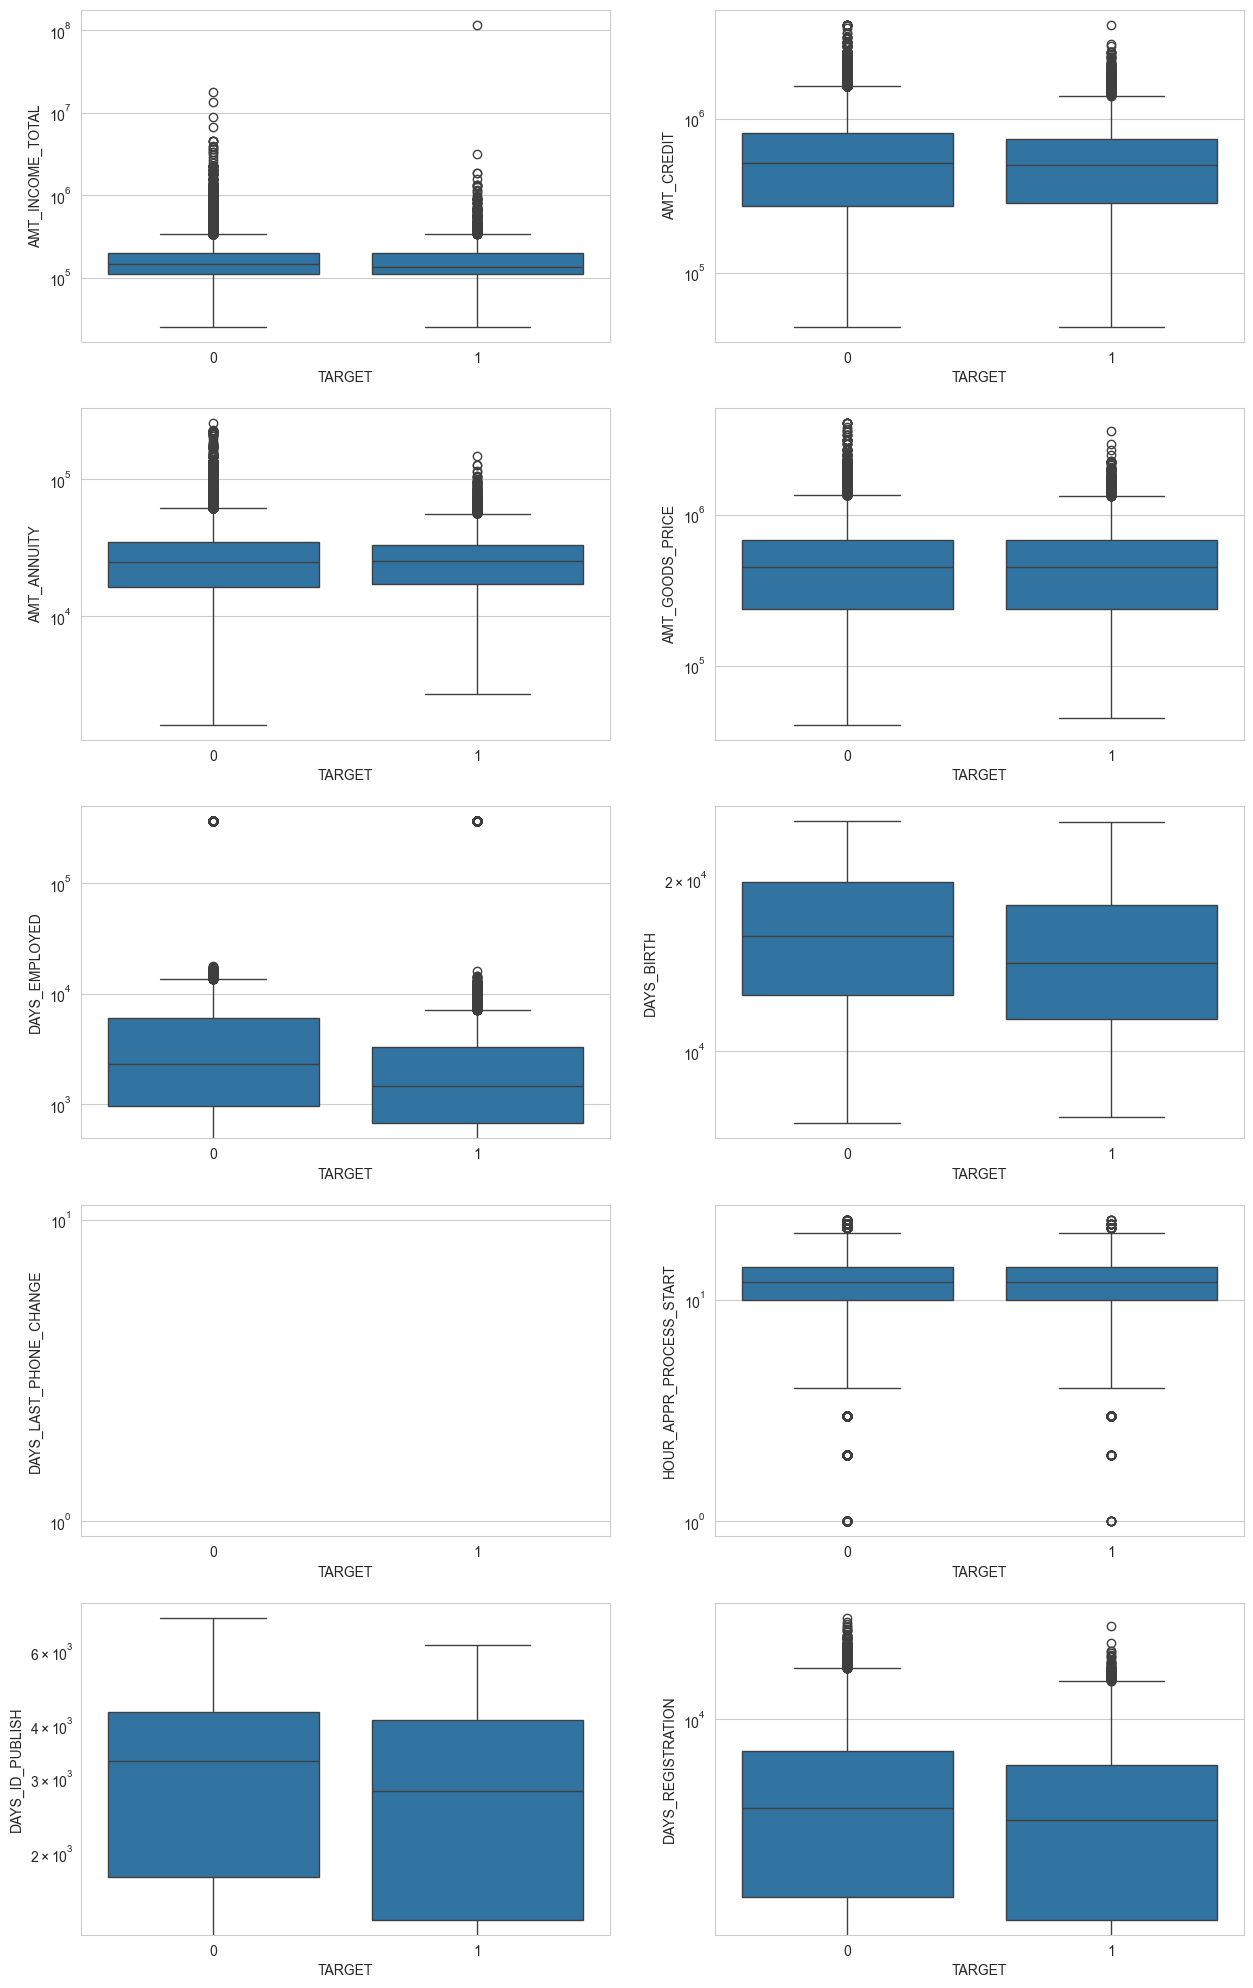

In [79]:
# plotting boxplots for the following numerical columns against TARGET variable
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i,col in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i+1)
    sns.boxplot(x='TARGET', y=application_data[col], data=application_data)
    plt.yscale('log')
plt.show() 

In [ ]:
'''We observe that loan lenders should prefer people with higher 'DAYS_EMPLOYED' AND 'DAYS_BIRTH' to lend.
Also, similarly, DAYS_ID_PUBLISH and DAYS_REGISTRATION also show similar correlation that defaulters have lower values
of these variables.
'''

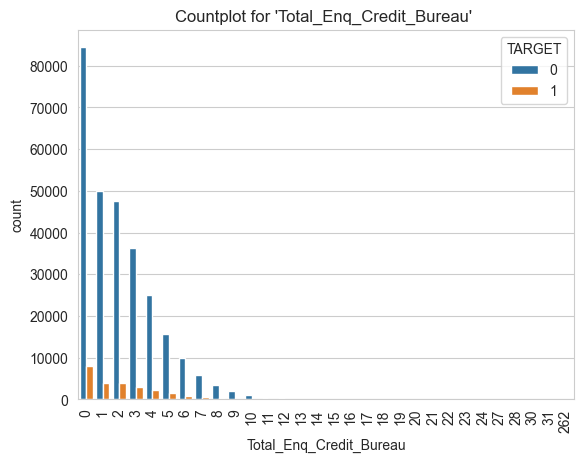

In [92]:
# checking for the custom column 'Total_Enq_Credit_Bureau'
application_data['Total_Enq_Credit_Bureau']= application_data['Total_Enq_Credit_Bureau'].astype('int')
sns.countplot(data=application_data, x='Total_Enq_Credit_Bureau', hue='TARGET')
plt.xticks(rotation=90)
plt.title("Countplot for 'Total_Enq_Credit_Bureau' ")
plt.show()

In [ ]:
'''we observe that most of the applicants have lesser number of credit bureau enquiries'''

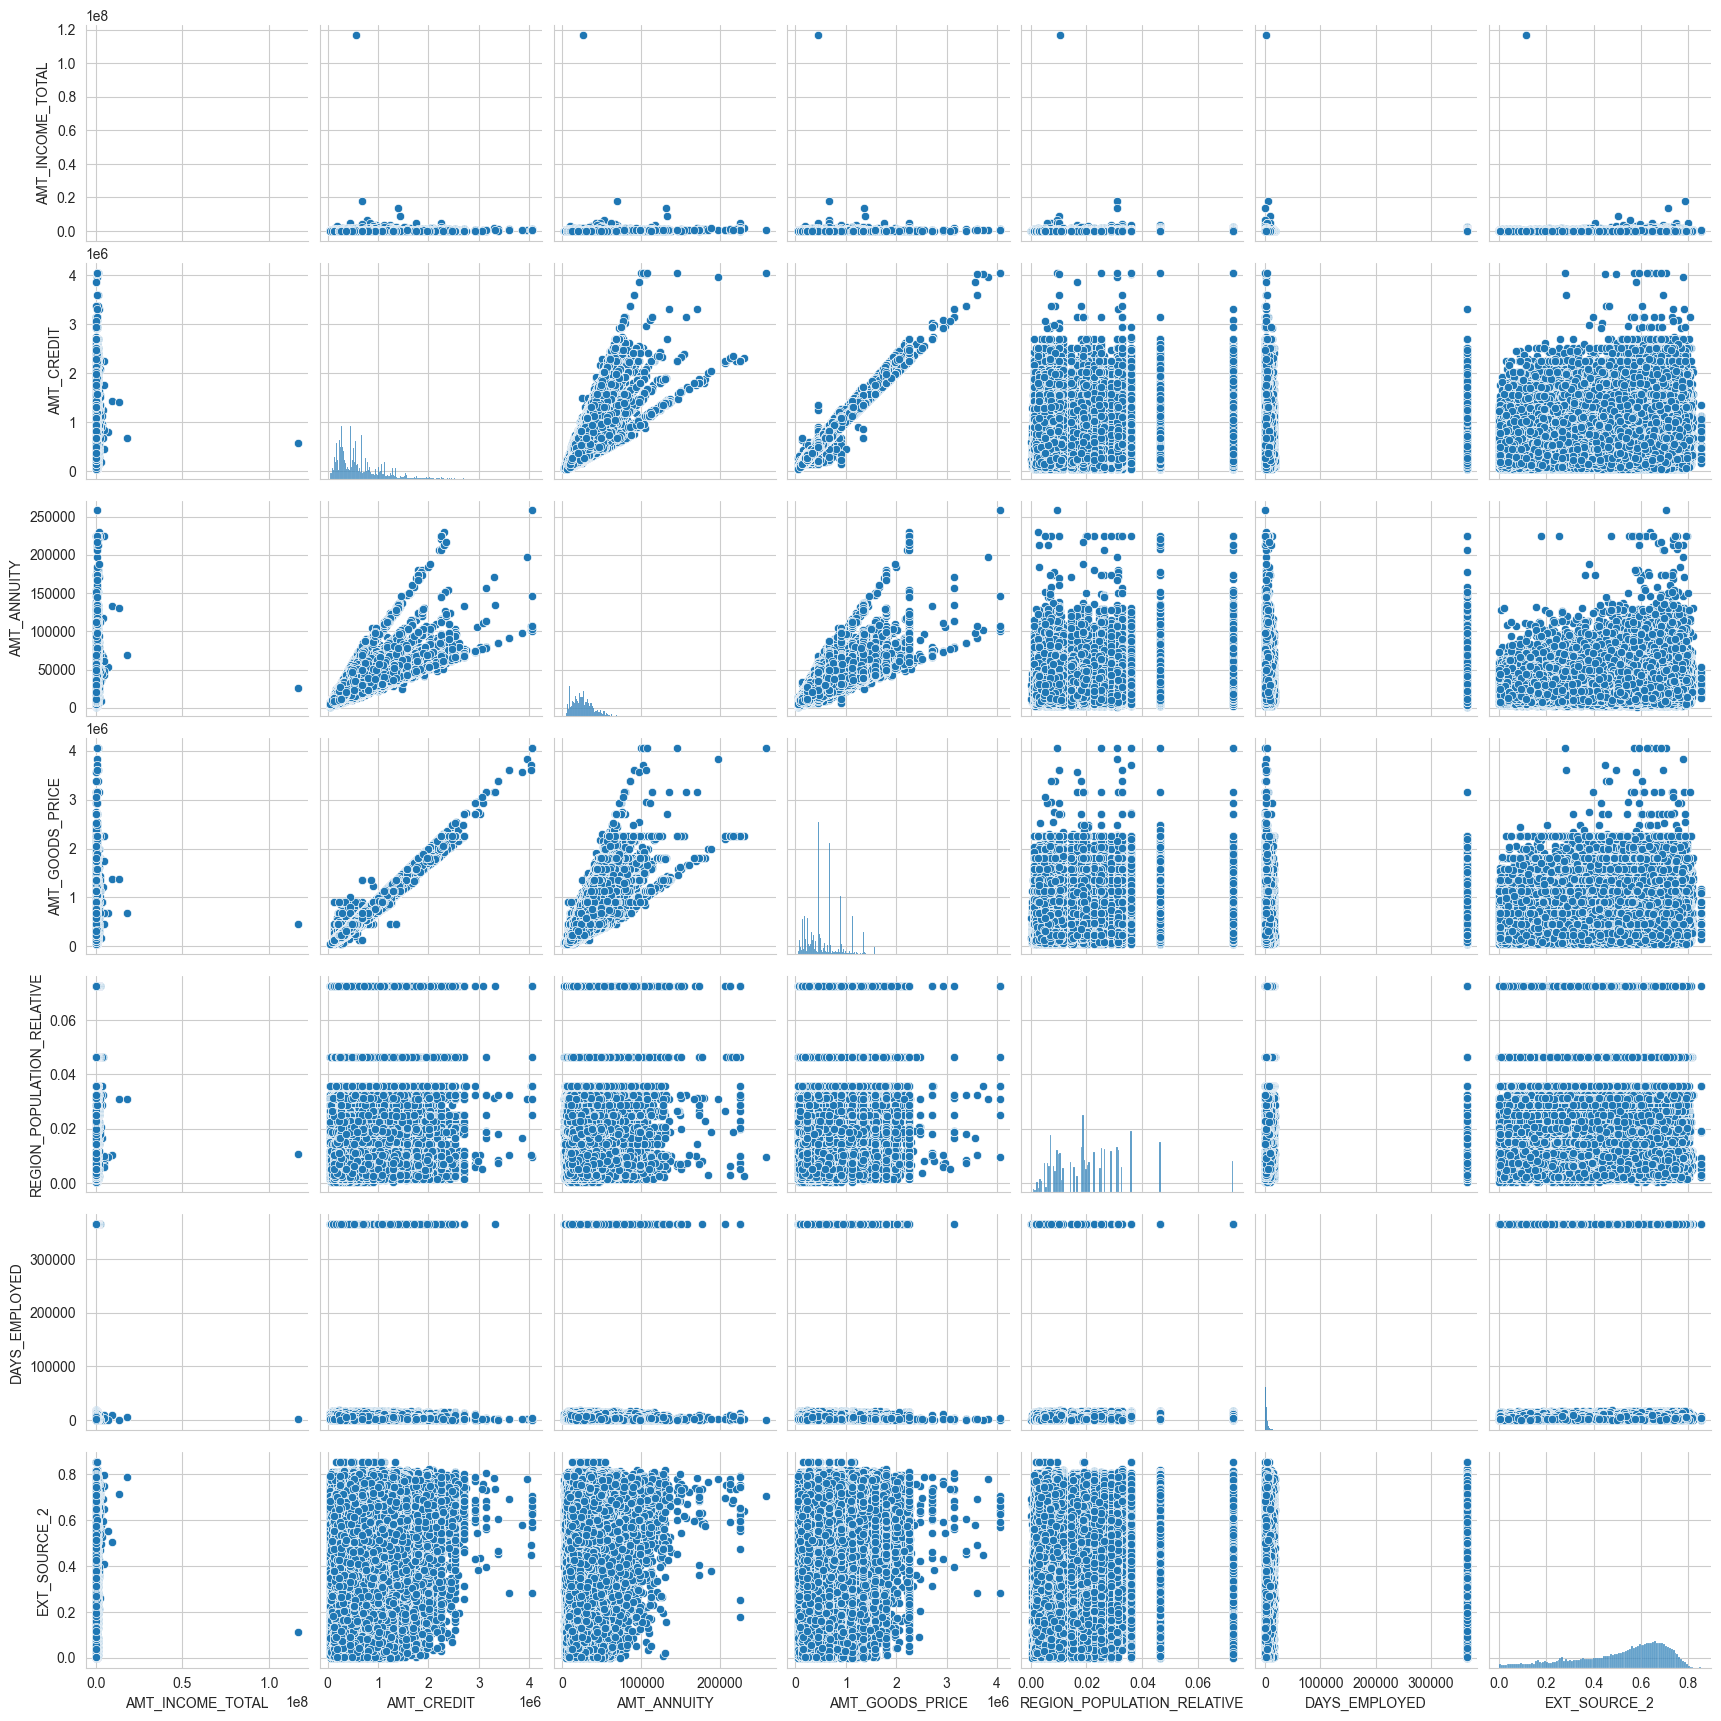

In [93]:
# Utilizing pairplot to efficiently identify potential patterns among selected
# numerical variables that we hypothesize may exhibit meaningful relationships.

num_variables_pairplot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                          'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2']

sns.pairplot(application_data[num_variables_pairplot])
plt.show()

<Figure size 640x480 with 0 Axes>

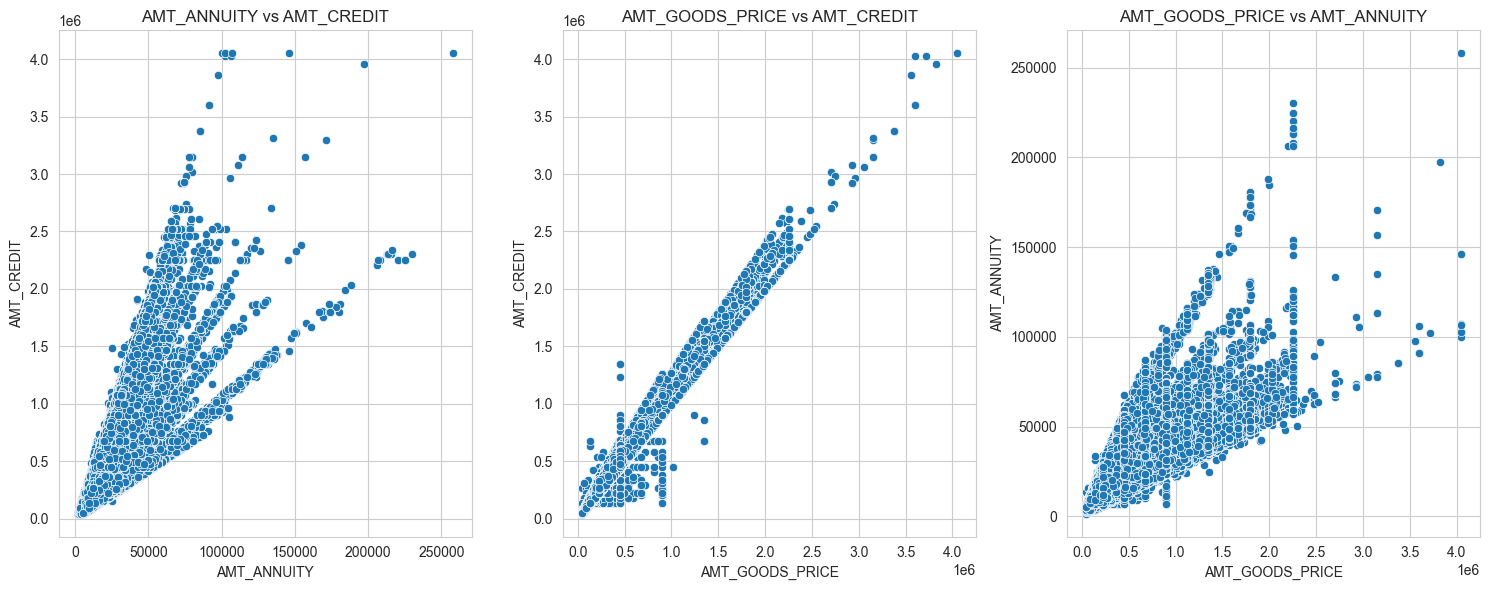

In [213]:
# plotting significant scatterplots from above pairplots to see them clearly
# we will be plotting : AMT_ANNUITY vs AMT_CREDIT, AMT_GOODS_PRICE vs AMT_CREDIT
# and AMT_GOODS_PRICE vs AMT_ANNUITY
plt.suptitle('Scatterplots for variables showing correlation')
plt.figure(figsize=(15,6))
plt.subplot(131)
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data= application_data)
plt.title('AMT_ANNUITY vs AMT_CREDIT')


plt.subplot(132)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data= application_data)
plt.title('AMT_GOODS_PRICE vs AMT_CREDIT')
plt.tight_layout()


plt.subplot(133)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_ANNUITY', data= application_data)
plt.title('AMT_GOODS_PRICE vs AMT_ANNUITY')
plt.tight_layout()
plt.show()

In [ ]:
'''
AMT_ANNUITY, AMT_GOODS_PRICE AND AMT_CREDIT show direct proportionality in variation. Meaning increase in one of these
three causes increase in all of these three variables. No other significant inferences can be drawn here.
'''

In [ ]:
'''Now let us merge the previous_application to application_data to do our analysis further '''

##### Merging application_data and previous_application into a new dataframe 'df'

In [94]:
'''
Performing a Left Join:
We are executing a left join to ensure that all rows from the application data are retained. 
This allows us to merge the historical application data for each applicant seamlessly. 
Using a left join prevents the loss of data for new customers who do not have previous records, 
which would occur if we used an inner join. Additionally, this join will cause the current data 
to be duplicated based on the number of corresponding entries found in the previous application data. 
With this approach, we are ensuring comprehensive data integration and analysis.
'''


'\nPerforming a Left Join:\nWe are executing a left join to ensure that all rows from the application data are retained. \nThis allows us to merge the historical application data for each applicant seamlessly. \nUsing a left join prevents the loss of data for new customers who do not have previous records, \nwhich would occur if we used an inner join. Additionally, this join will cause the current data \nto be duplicated based on the number of corresponding entries found in the previous application data. \nWith this approach, we are ensuring comprehensive data integration and analysis.\n'

In [98]:
df= pd.merge(application_data, previous_application, how='left', on='SK_ID_CURR', suffixes=('_Current', '_Previous'))
print(df.shape)
df.head()

(1430155, 85)


SK_ID_CURR TARGET NAME_CONTRACT_TYPE_Current CODE_GENDER FLAG_OWN_CAR  \
0     100002      1                 Cash loans           M            N   
1     100003      0                 Cash loans           F            N   
2     100003      0                 Cash loans           F            N   
3     100003      0                 Cash loans           F            N   
4     100004      0            Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0               Y             0         202500.00           406597.50   
1               N             0         270000.00          1293502.50   
2               N             0         270000.00          1293502.50   
3               N             0         270000.00          1293502.50   
4               Y             0          67500.00           135000.00   

   AMT_ANNUITY_Current  AMT_GOODS_PRICE_Current NAME_TYPE_SUITE_Current  \
0             24700.50                351000.00           Unaccompanied   
1             35698.50               1129500.00                  Family   
2             35698.50               1129500.00                  Family   
3             35698.50               1129500.00                  Family   
4              6750.00                135000.00           Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                        0.02        9461            637   
1  House / apartment                        0.00       16765           1188   
2  House / apartment                        0.00       16765           1188   
3  House / apartment                        0.00       16765           1188   
4  House / apartment                        0.01       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE  \
0            3648.00             2120          1              1   
1            1186.00              291          1              1   
2            1186.00              291          1              1   
3            1186.00              291          1              1   
4            4260.00             2531          1              1   

  FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
0               0                1          1          0        Laborers   
1               0                1          1          0      Core staff   
2               0                1          1          0      Core staff   
3               0                1          1          0      Core staff   
4               1                1          1          0        Laborers   

   CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                1                    2                           2   
1                2                    1                           1   
2                2                    1                           1   
3                2                    1                           1   
4                1                    2                           2   

  WEEKDAY_APPR_PROCESS_START_Current  HOUR_APPR_PROCESS_START_Current  \
0                          WEDNESDAY                               10   
1                             MONDAY                               11   
2                             MONDAY                               11   
3                             MONDAY                               11   
4                             MONDAY                                9   

  REG_REG

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 85 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   SK_ID_CURR                           1430155 non-null  object  
 1   TARGET                               1430155 non-null  object  
 2   NAME_CONTRACT_TYPE_Current           1430155 non-null  object  
 3   CODE_GENDER                          1430155 non-null  object  
 4   FLAG_OWN_CAR                         1430155 non-null  object  
 5   FLAG_OWN_REALTY                      1430155 non-null  object  
 6   CNT_CHILDREN                         1430155 non-null  int64   
 7   AMT_INCOME_TOTAL                     1430155 non-null  float64 
 8   AMT_CREDIT_Current                   1430155 non-null  float64 
 9   AMT_ANNUITY_Current                  1430155 non-null  float64 
 10  AMT_GOODS_PRICE_Current              1430155 non-null 

In [100]:
df.SK_ID_CURR.nunique()

307511

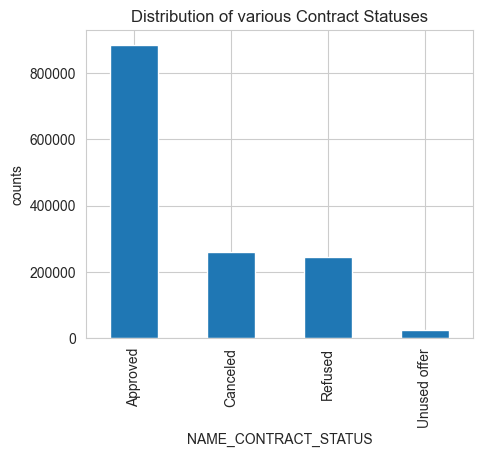

In [187]:
# checking overall distribution of NAME_CONTRACT_STATUS
plt.figure(figsize=(5,4))
df.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.title('Distribution of various Contract Statuses')
plt.ylabel('counts')
plt.show()

In [ ]:
'''Most of the loans are approved while very few are unused offers.'''

<Axes: ylabel='NAME_GOODS_CATEGORY'>

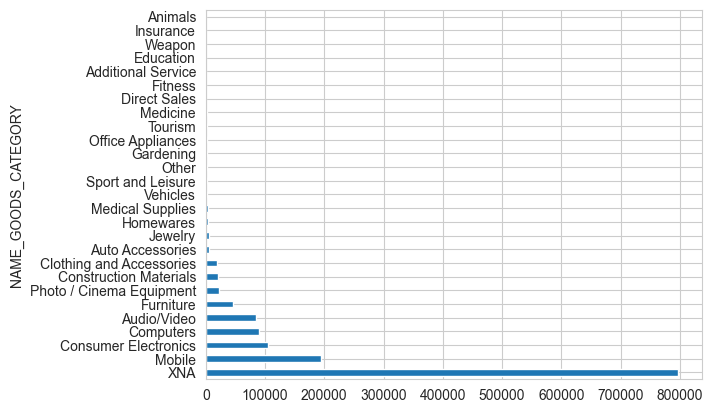

In [134]:

# df.NAME_CLIENT_TYPE.value_counts()
df.NAME_GOODS_CATEGORY.value_counts().plot.barh()

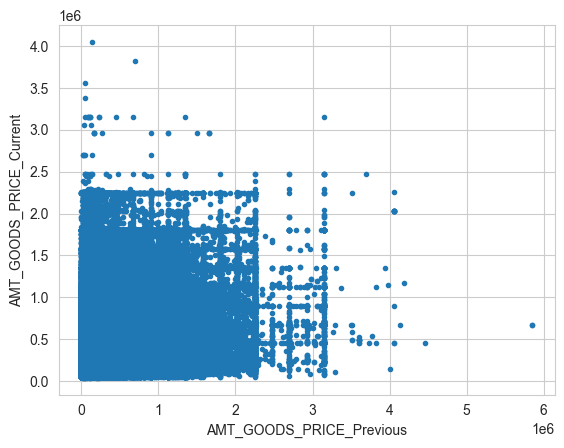

In [137]:
# comparing good prices in current and previous dataset
plt.scatter(x='AMT_GOODS_PRICE_Previous', y='AMT_GOODS_PRICE_Current', data= df, marker='.')
plt.xlabel('AMT_GOODS_PRICE_Previous')
plt.ylabel('AMT_GOODS_PRICE_Current')
plt.show()

In [ ]:
'''no pattern is seen indicating similar behavious of Goods Prices for both current and historical applications.'''

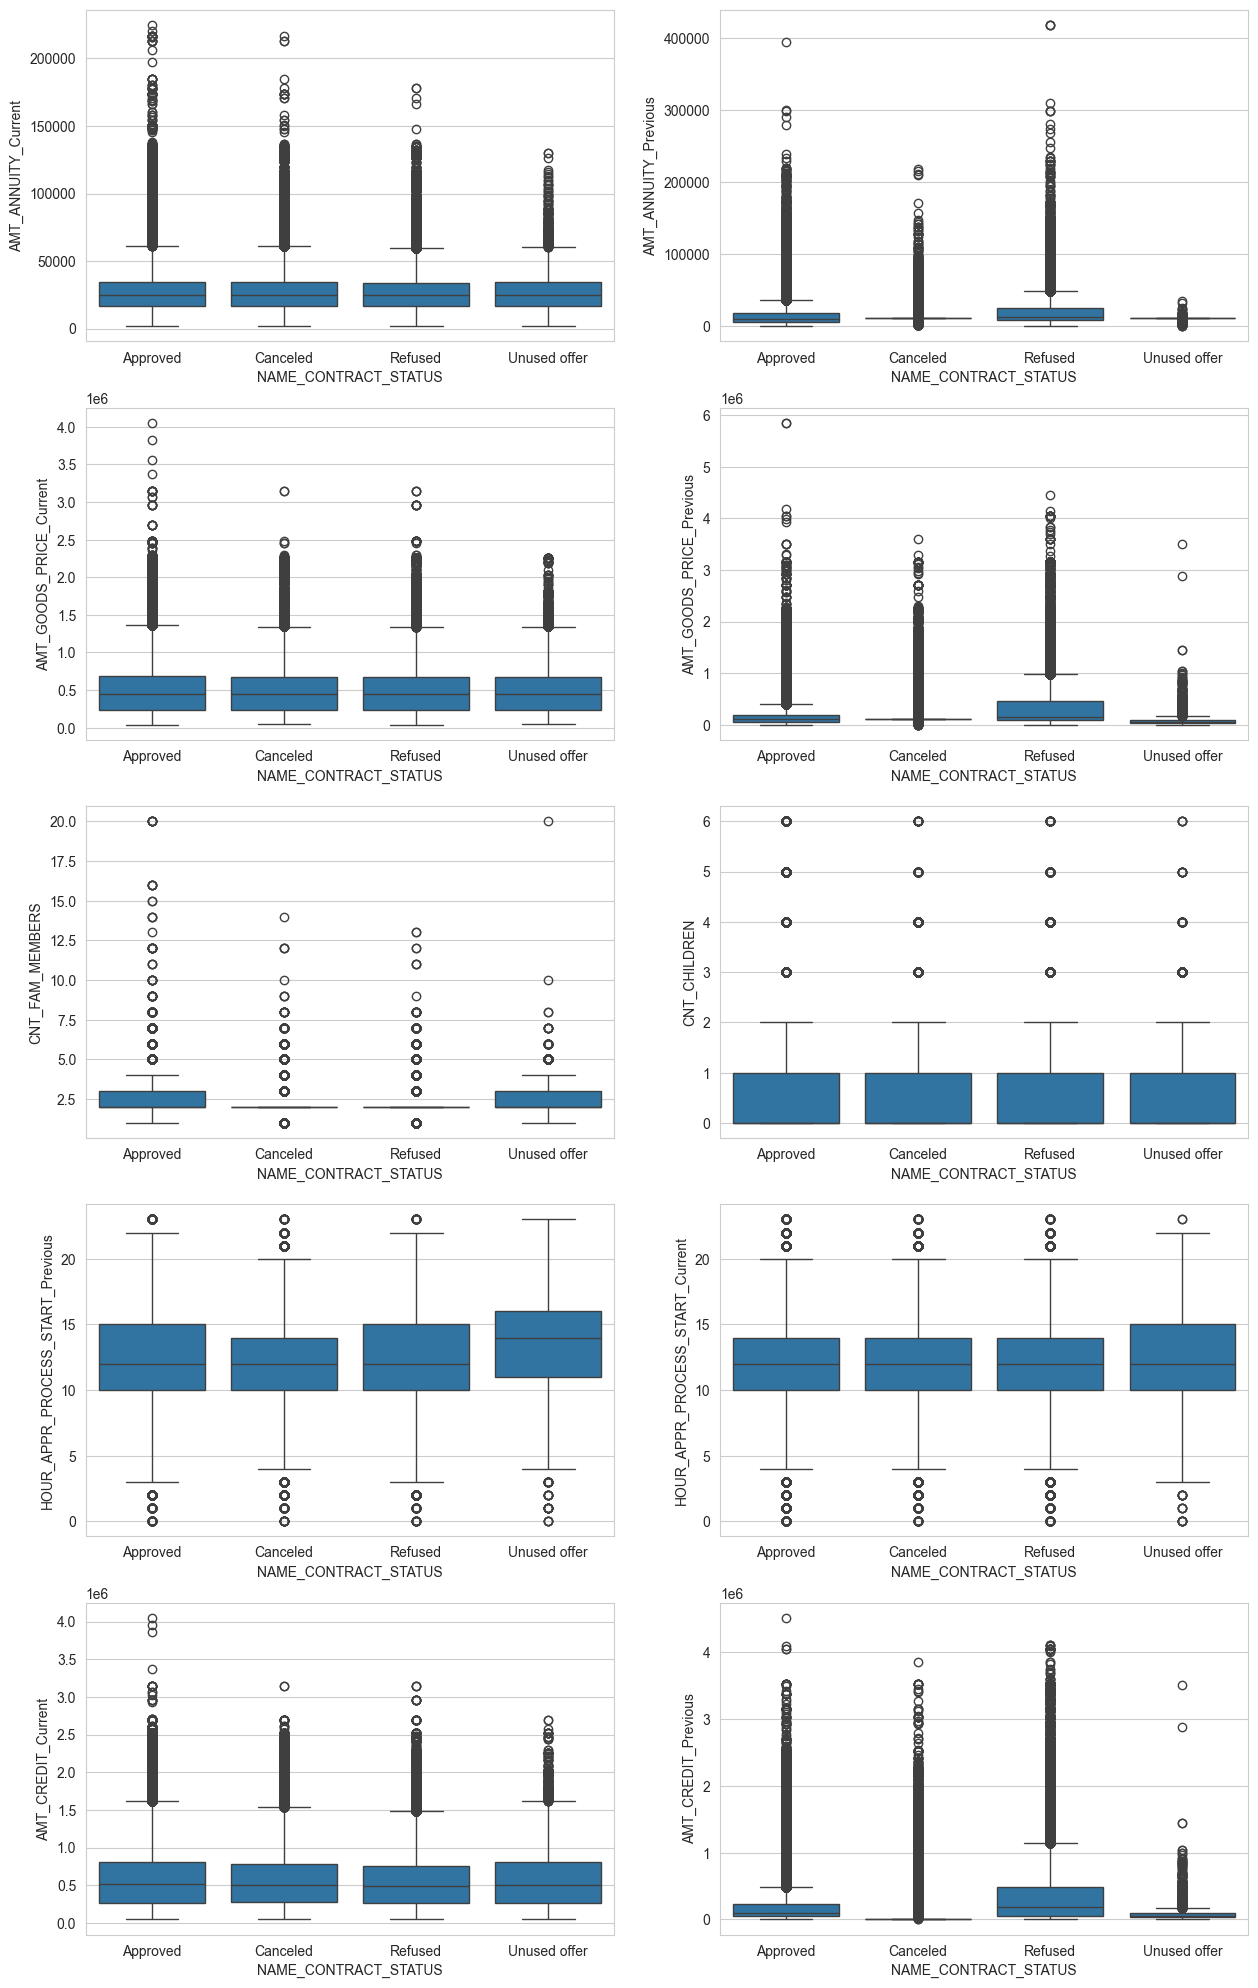

In [139]:
# creating boxplots for continuous variables of our interest to observe any patterns in distribution
# based on categories of 'NAME_CONTRACT_STATUS'.
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
plt.figure(figsize=(15,25))
for i,col in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y= df[col],data=df)
plt.show() 

In [ ]:
'''
AMT_GOODS_PRICE_Previous vs NAME_CONTRACT_STATUS shows that higher goods price slightly increase chance of refusal of loan.
'''

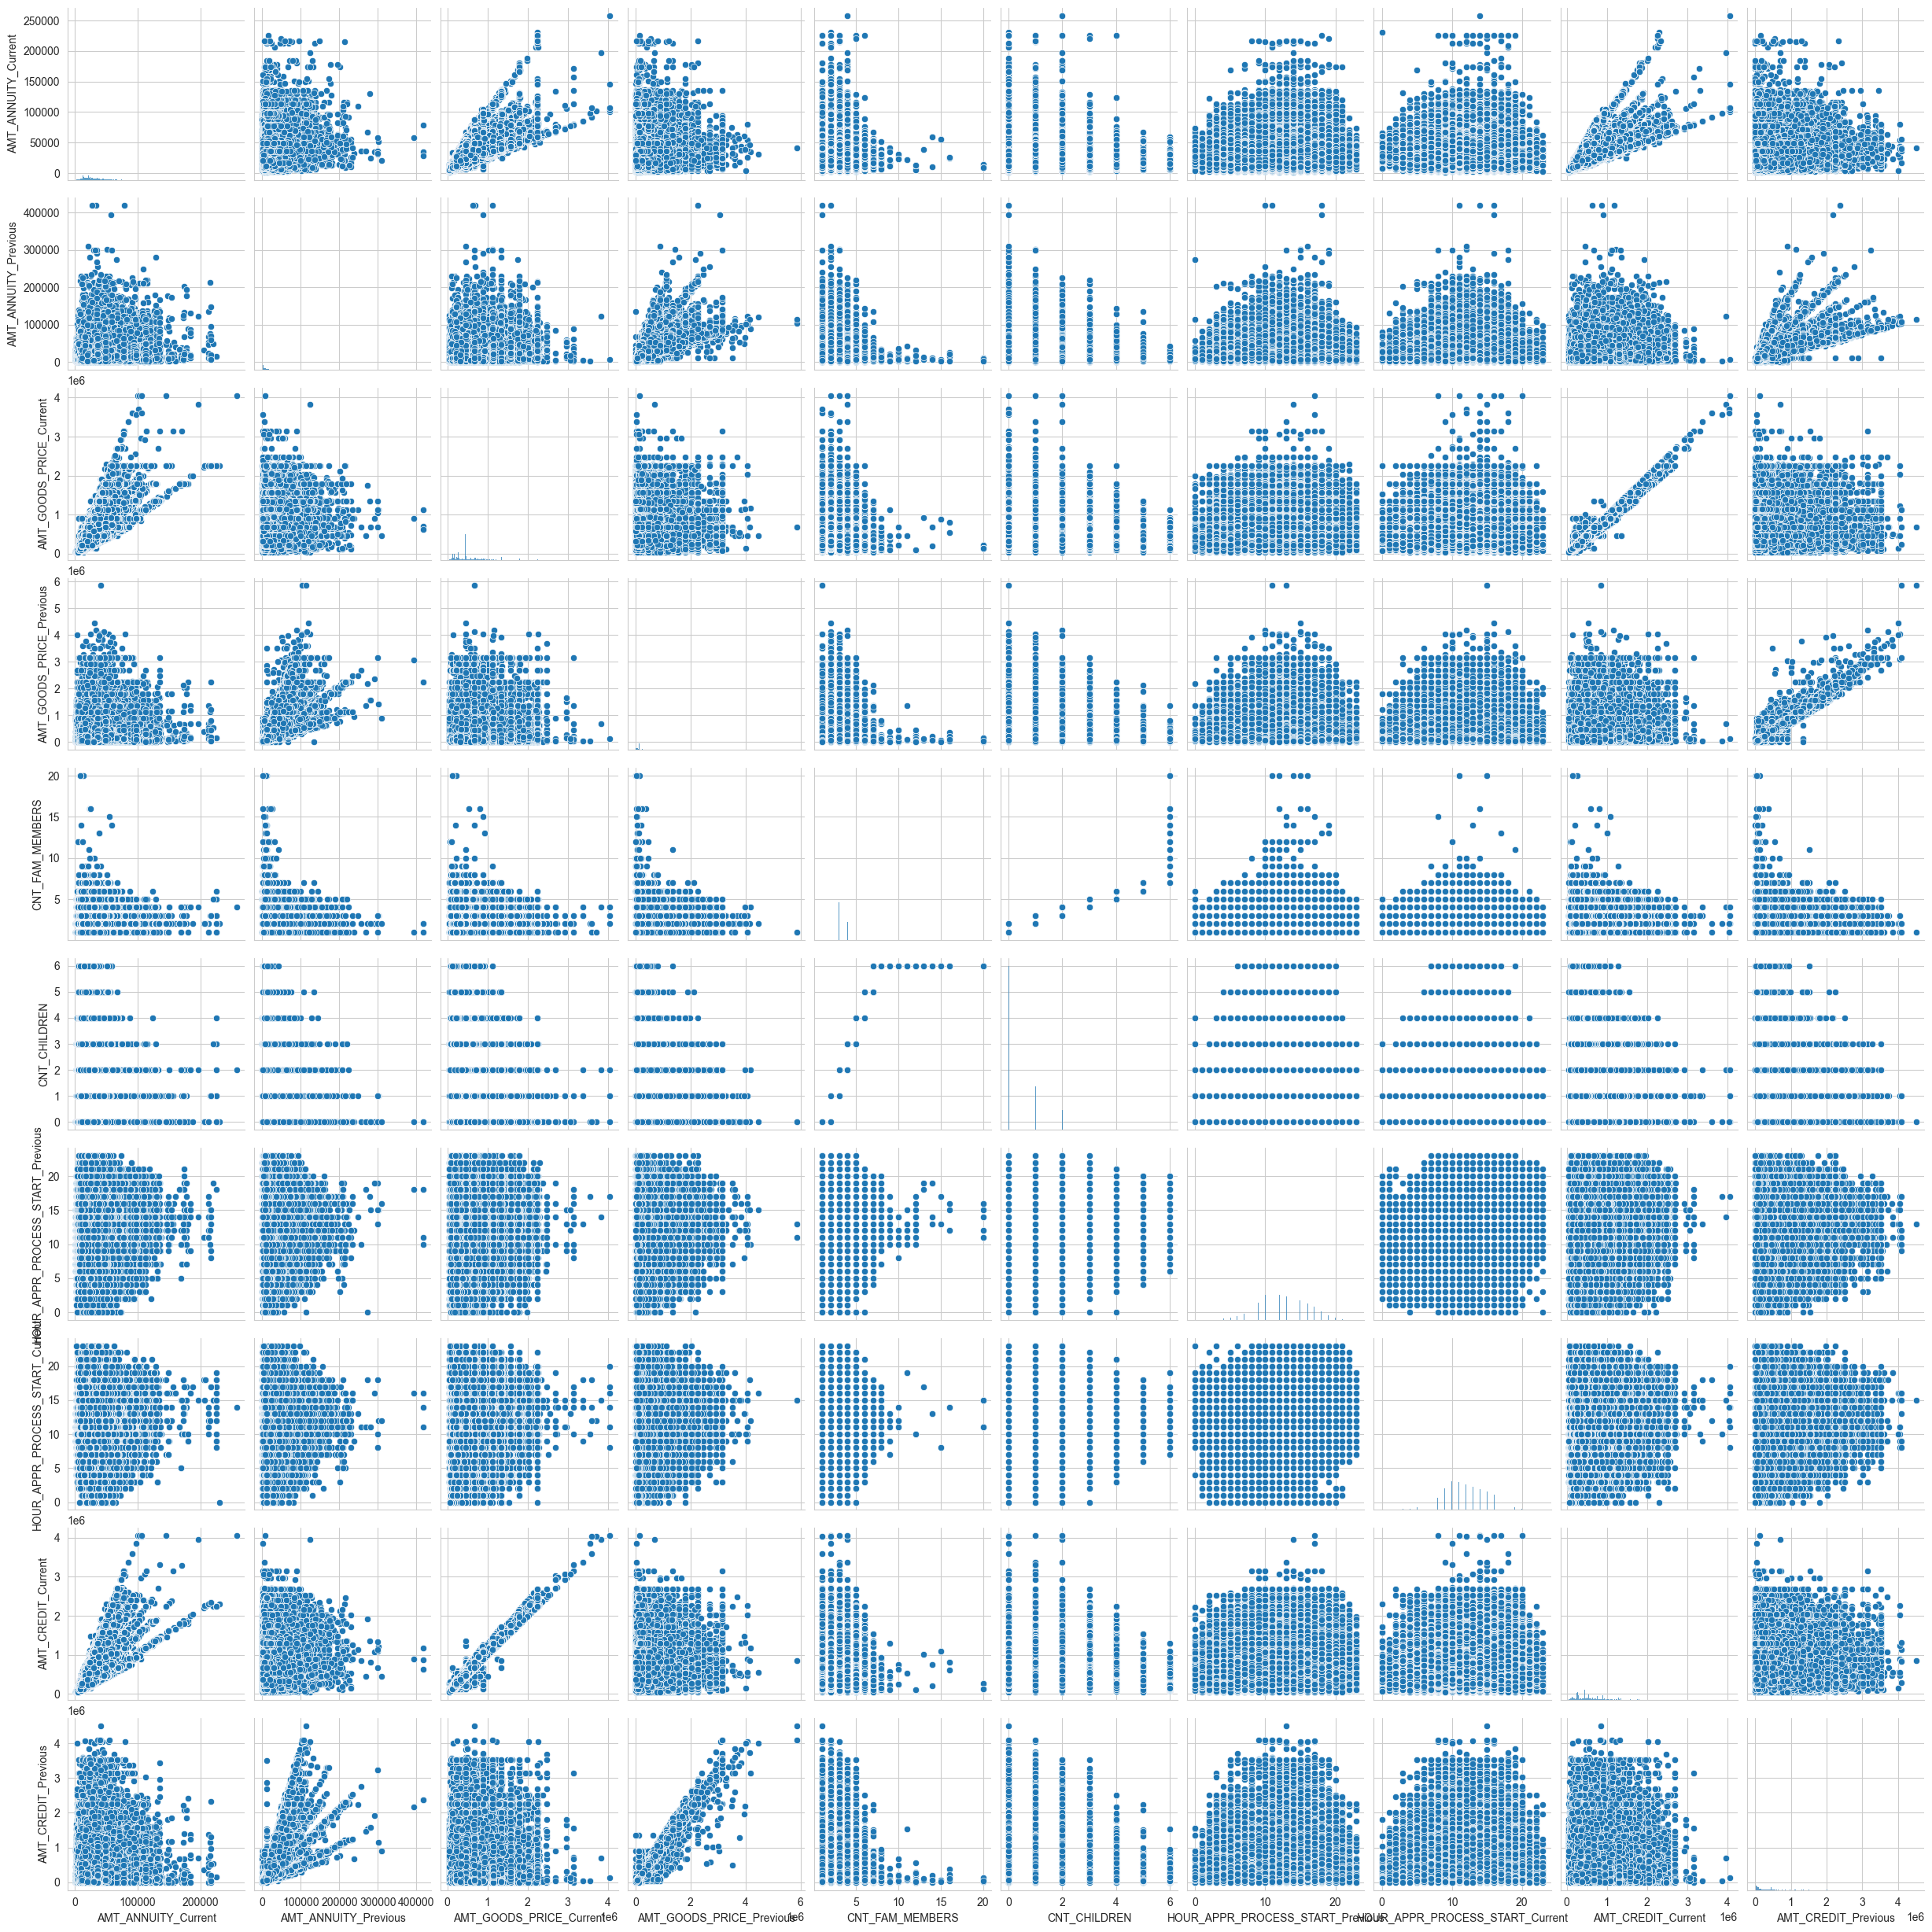

In [140]:
# Now plotting pairplot if we see any patterns
sns.pairplot(df[continous_columns])
plt.show()

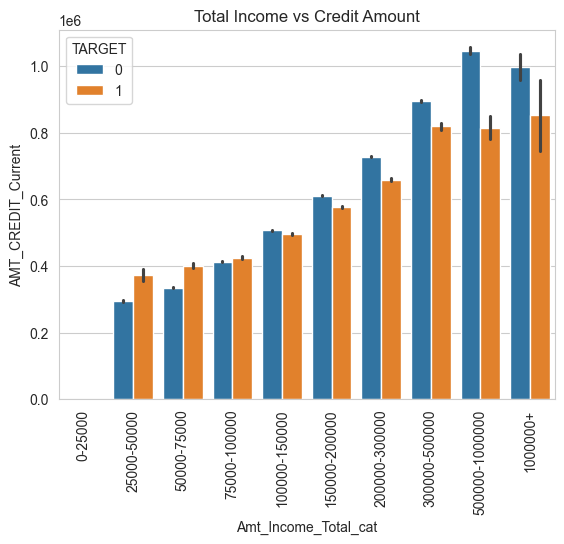

In [142]:
# plotting Amt_Income_Total_cat vs AMT_CREDIT_Current
sns.barplot(x='Amt_Income_Total_cat', y= 'AMT_CREDIT_Current', hue='TARGET', data= df)
plt.xticks(rotation=90)
plt.title('Total Income vs Credit Amount')
plt.show()

In [ ]:
'''we see that clients with higher Income have got higher credit amount as observed earlier in the analysis.
Also, as the total income increases, the applicant is less and less likely to default on the payment.
Lesser Income people default more even when credit amount is also less.
'''

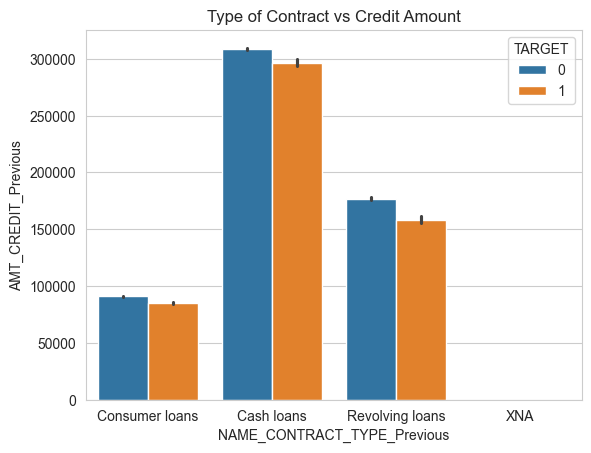

In [145]:
# looking at relationship between contract types and credit amounts
sns.barplot(x='NAME_CONTRACT_TYPE_Previous', y= 'AMT_CREDIT_Previous', data=df, hue='TARGET')

plt.title('Type of Contract vs Credit Amount')
plt.show()

In [ ]:
'''We observe that Cash loans have the highest credit amounts in historical data while 
consumer loans are generally associated with smaller credited amount to applicants.
Likelyness of defaulting is similar in various types of contracts'''

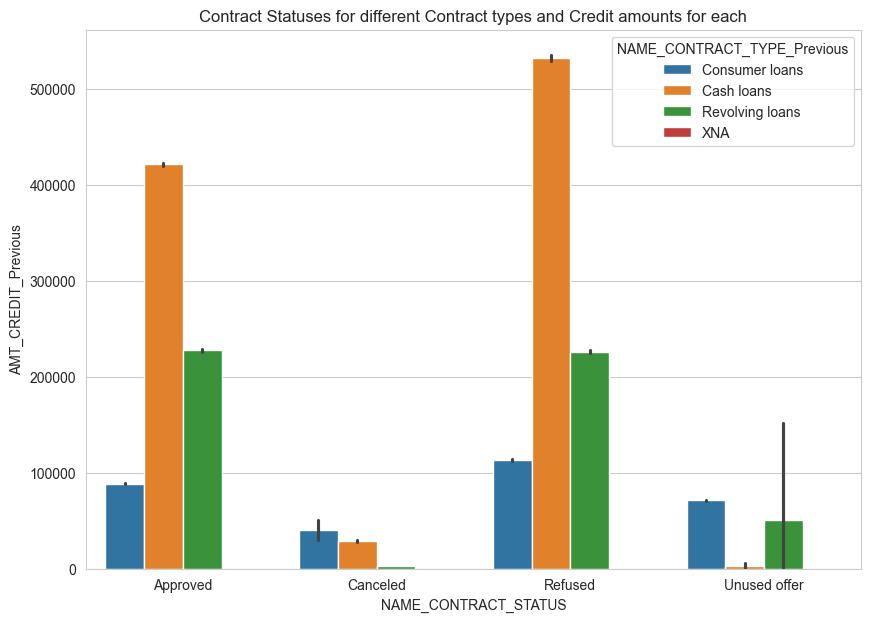

In [215]:
# plotting relationship between categorical 'NAME_CONTRACT_STATUS' vs 'AMT_CREDIT_Previous'
plt.figure(figsize=(10,7))
sns.barplot(x= 'NAME_CONTRACT_STATUS', y= 'AMT_CREDIT_Previous', hue='NAME_CONTRACT_TYPE_Previous', data=df)
plt.title('Contract Statuses for different Contract types and Credit amounts for each')

plt.show()

In [148]:
'''we observe that more cash loans are more refused than approved. Also Revolving loans have amost 50% chance of getting approved or refused.
Revolving loan applications are rarely cancelled. Cash loans are engaged with most amount of credit '''

'we observe that more cash loans are refused than approved. Also Revolving loans have amost 50% chance of getting approved or refused.\nRevolving loan applications are rarely cancelled. Cash loans are engaged with most amount of credit '

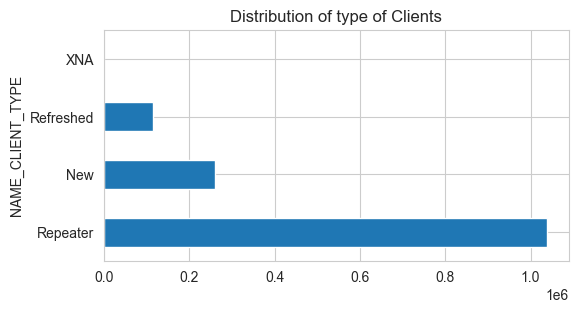

In [152]:
# looking at type of client using NAME_CLIENT_TYPE variable
plt.figure(figsize=(6,3))
df.NAME_CLIENT_TYPE.value_counts().plot.barh()
plt.title('Distribution of type of Clients')
plt.show()

In [ ]:
'''we observe that most of the applications are repeaters while refreshed clients are lesser in number.'''

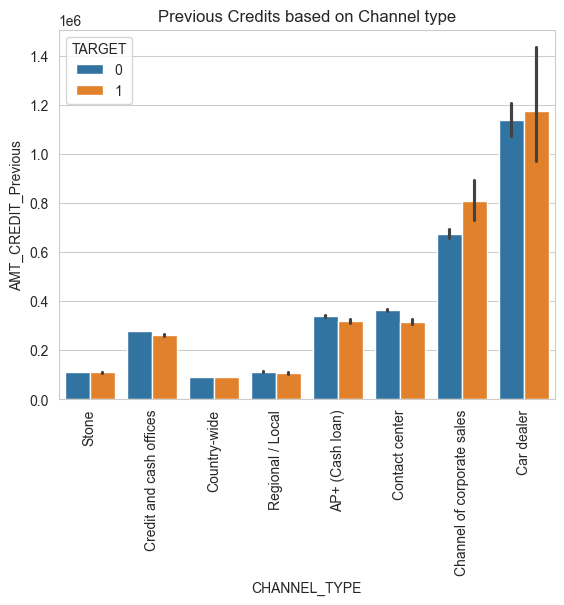

In [155]:
# df.CHANNEL_TYPE.value_counts()
sns.barplot(x='CHANNEL_TYPE', y= 'AMT_CREDIT_Previous', data=df, hue='TARGET')
plt.title('Previous Credits based on Channel type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''we observe that car dealers and Corporate Sales Channel have the highest amount of credit 
while local channel, stone and credit and cash offices had lower credit amounts in historical data.
'''

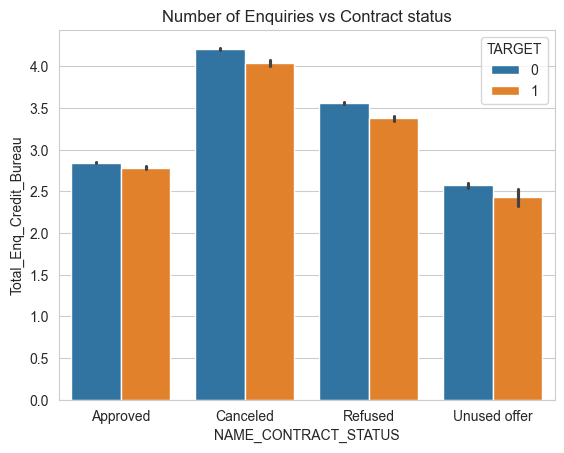

In [184]:
# plotting for custom column : 'Total_Enq_Credit_Bureau' against categorical 'NAME_CONTRACT_STATUS'

sns.barplot(x= 'NAME_CONTRACT_STATUS', y= 'Total_Enq_Credit_Bureau', data=df, hue='TARGET')
plt.title('Number of Enquiries vs Contract status')
plt.show()


In [ ]:
'''we see that more number of Credit Bureau enquiries correspond to either 
Cancelling of Refusing of the contracts. While Lesser number of Enquiries increases likelihood 
of Approval or getting (Unused) offer for the loans.
However, we cannot tell much about possibility of Defaulting based on these two variables.
'''

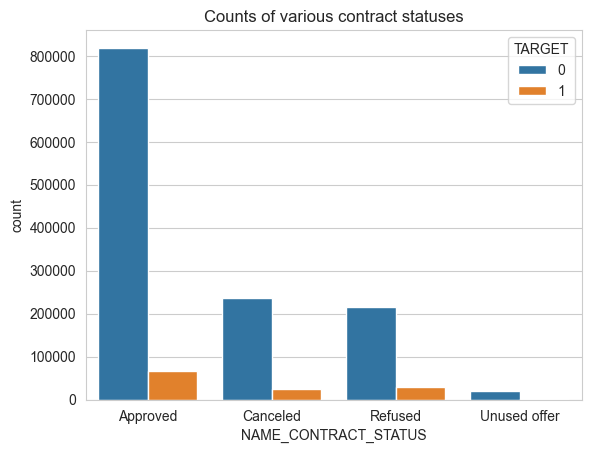

In [186]:
# looking at NAME_CONTRACT_STATUS 
sns.countplot(x='NAME_CONTRACT_STATUS', data=df, hue= 'TARGET')
plt.title('Counts of various contract statuses')

plt.show()

In [ ]:
''' we can see that if client is a defaulter, there is lesser chance of approval of loan as
in approved category, proportion of defaulters is least.
'''

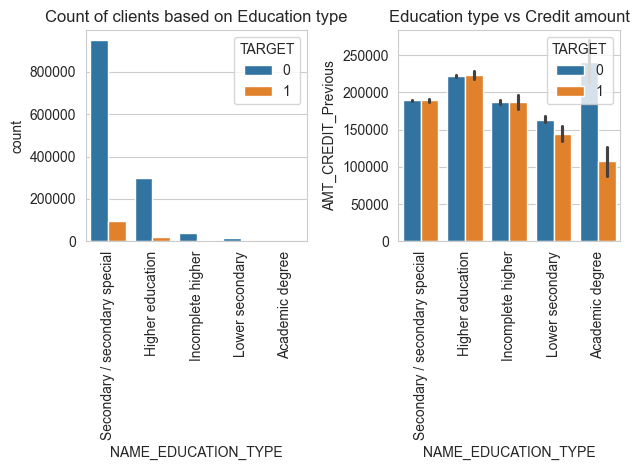

In [163]:
# looking at 'NAME_EDUCATION_TYPE' variable
plt.subplot(121)
sns.countplot(x= 'NAME_EDUCATION_TYPE', data=df, hue='TARGET')
plt.title('Count of clients based on Education type')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(x= 'NAME_EDUCATION_TYPE', y='AMT_CREDIT_Previous', data= df, hue= 'TARGET')
plt.title('Education type vs Credit amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [164]:
'''We observe that people with higher education and secondary special education apply for most number of loans.
We also see that Academic degree clients are very few but they default when credit amount is lesser.
People with Higher Education are most likely to get a higher credit amount.
'''

'We observe that people with higher education and secondary special education apply for most number of loans.\nWe also see that Academic degree clients are very few but they default when credit amount is lesser.\nPeople with Higher Education are most likely to get a higher credit amount.\n'

In [165]:
'''This concludes our analysis. However, data analysis is inherently an ongoing process, and there are always 
additional insights that can be discovered. Therefore, the journey of exploration and understanding never truly ends.
'''

'This concludes our analysis. However, data analysis is inherently an ongoing process, and there are always \nadditional insights that can be discovered. Therefore, the journey of exploration and understanding never truly ends.\n'

### Recommendations